Author of notebook: Luis A Haddock Soto (TCF Lab)

Date Created: 2023-04-03

Date last modified: 2023-05-31

## Tracing the origin of SARS-CoV-2 Omicron-like Spike sequences detected in wastewater

Martin M Shafer%,  Max J Bobholz%,  William C Vuyk%,  Devon A Gregory%,  Adelaide Roguet,  Luis A Haddock Soto, Clayton Rushford,  Kayley H Janssen,  Hunter J Ries,  Hannah E Pilch,  Paige A Mullen,  Rebecca B Fahney,  Wanting Wei, Matthew Lambert, Jeff Wenzel,  Peter Halfmann,  Yoshihiro Kawaoka,  Nancy A Wilson,  Thomas C Friedrich,  Ian W Pray,  Ryan Westergaard,  David H O'Connor, Marc Johnson^

%equal contribution

[View preprint](https://www.medrxiv.org/content/10.1101/2022.10.28.22281553v4)


^Corresponding Author  
Marc C. Johnson  
Phone: 573-882-1519  
marcjohnson@missouri.edu  
471c Bond Life Sciences Center  
1201 Rollins St  
Columbia, MO USA 65211



These sequence reads were generated by the Wisconsin State Laboratory of Hygiene using an Illumina MiSeq instrument  from 425 amplicons covering the whole SARS-CoV-2 genome amplified from wastewater samples with the QIAseq DIRECT SARS-CoV-2 Kit A. 

Illumina_WGS fastq files contain these unaligned sequence reads. Each sample should have both an R1 and and R2 fastq file, which result from Illumina's paired-end sequencing technique. Illumina reads are highly accurate and short.




### SARS-CoV-2 Annotations

https://www.ncbi.nlm.nih.gov/gene/43740568

### SARS-CoV-2 Reference used

MN908947 - Available on NCBI under GENBANK ID [MN908947.3](https://www.ncbi.nlm.nih.gov/nuccore/MN908947)

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import glob
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pathlib import Path
from os.path import splitext
from functools import reduce
from pandas.api.types import is_numeric_dtype
import warnings
from pandas.core.common import SettingWithCopyWarning
from matplotlib.font_manager import FontProperties 
from matplotlib import cm
import itertools
from matplotlib import container
from matplotlib import gridspec
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import matplotlib as mpl
from pandas.plotting import table
import seaborn as sns
from scipy import stats
from statistics import mean
from scipy.integrate import quad
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import csv
from pathlib import Path
import scipy.stats as stats
import numpy as np
import json
import requests
import datetime
from scipy.stats import binomtest
from Bio import SeqIO
from scipy.stats.contingency import relative_risk
from scipy.stats import binomtest
%load_ext rpy2.ipython

## Tiempoints and associated tsv files
>### June Timepoint (2022-06-16)  
>>june16_152_2022_06_16  
>>june16_229_2022_06_16  
>>june16_231_2022_06_16  
>### August Timepoint (2022-08-16)  
>>august16_206_2022_08_16  
>>august16_216_2022_08_16  
>>august16_230_2022_08_16  
>### September Timepoint #1 (2022-09-23)  
>>september23_221_2022_09_23  
>>september23_222_2022_09_23  
>### September Timepoint #2 (2022-09-27)  
>>september27_223_2022_09_27  
>>september27_224_2022_09_27  

In [313]:
#Format ivar output vcf file into SNPgenie input

def format_isnv(month, timepoint):
    data = pd.read_csv('ivar_outputs/'+month+'/'+timepoint+'.tsv', sep='\t')
    data.rename(columns={'REGION':'#CHROM', 'REF_QUAL':'QUAL', 'ALT_FREQ':'FREQ','PASS':'FILTER','REF_AA':'first_aa',
                    'ALT_AA':'last_aa', 'TOTAL_DP':'DP'}, inplace=True)
    data = data[['#CHROM', 'POS', 'REF', 'ALT','DP','QUAL','FREQ','FILTER','first_aa', 'last_aa']]
    data['INFO'] = 'DP=' + data['DP'].apply(str) + ';AF=' + data['FREQ'].apply(str)
    data['ID'] = '.'
    data = data[['#CHROM', 'POS', 'ID','REF','ALT','QUAL','FILTER','INFO']]
    data = data.set_index('#CHROM')
    data.to_csv('ivar_outputs/'+month+'/'+timepoint+'_isnv.vcf', sep='\t')



In [314]:
format_isnv("june16", "june16_152_2022_06_16")
format_isnv("june16", "june16_229_2022_06_16")
format_isnv("june16", "june16_231_2022_06_16")

format_isnv("august16", "august16_206_2022_08_16")
format_isnv("august16", "august16_216_2022_08_16")
format_isnv("august16", "august16_230_2022_08_16")

format_isnv("september23", "september23_221_2022_09_23")
format_isnv("september23", "september23_222_2022_09_23")

format_isnv("september27", "september27_223_2022_09_27")
format_isnv("september27", "september27_224_2022_09_27")

## SnpGenie Analysis

In [3]:
%%bash
path='ivar_outputs/'
cd $path

for file in june*/*_isnv.vcf; 
do
sample=${file%%_isnv.vcf}
echo ${sample}

rm -r SNPGenie_Results
rm -r ${sample}_SNPGenie_Results

mkdir ${sample}_SNPGenie_Results

snpgenie.pl --minfreq=0.01 --snpreport=${sample}_isnv.vcf --vcfformat=2 \
--slidingwindow=30 --fastafile=../resources/MN908947_3.fasta --gtffile=../resources/MN908947_3.gff.txt

mv SNPGenie_Results ${sample}_SNPGenie_Results


done



june16/june16_152_2022_06_16


rm: SNPGenie_Results: No such file or directory




################################################################################
##                                                                            ##
##                             SNPGenie Initiated!                            ##
##                                                                            ##
################################################################################

  ###############################  LICENSE:  #################################
  ##            SNPGenie Copyright (C) 2015-19 Chase W. Nelson              ##
  ##            This program comes with ABSOLUTELY NO WARRANTY;             ##
  ##     This is free software, and you are welcome to redistribute it      ##
  ##               under certain conditions; see LICENSE.txt.               ##
  ############################################################################

WORKING_DIRECTORY=/Users/labadmin/Documents/wastewater_project/analysis_2023_04_03/ivar_outputs
RESULTS_DIRECTORY=/Us


## WARNING: In june16/june16_152_2022_06_16_isnv.vcf, the variant at site 21973,
## the variant data imply a negative number of T nucleotides: -2640.002382. This most often results from
## variants which are assigned to the wrong site in the SNP Report, or multiple copies of the same genes/exons in the GTF file. Results at this site
## are unreliable; T count set to 0; proceed with caution.

## WARNING: In june16/june16_152_2022_06_16_isnv.vcf, the variant at site 21973,
## the variant data imply a negative proportion of T nucleotides: -0.511926.
## This may result from rounding error, in which case the number will be very small in magnitude,
## variants which are assigned to the wrong site in the SNP Report, or multiple copies of the same genes/exons in the GTF file. Results at this site
## may be unreliable; T prop set to 0; proceed with caution.


Calculating and storing non-protein-coding genome and variant data ("junk" gets a bad rap!)... 
## Variant 'A' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_152_2022_06_16_isnv.vcf|178

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_152_2022_06_16_isnv.vcf|378

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_152_2022_06_16_isnv.vcf|2258

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_152_2022_06_16_isnv.vcf|3037

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_152_2022_06_16_isnv.vcf|3967

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_152_2022_06_16_isnv.vcf|6860

## Var


## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_152_2022_06_16_isnv.vcf|gene-orf1ab|3037

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_152_2022_06_16_isnv.vcf|gene-orf1ab|3967

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_152_2022_06_16_isnv.vcf|gene-orf1ab|6860

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_152_2022_06_16_isnv.vcf|gene-orf1ab|8140

## Variant 'A' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_152_2022_06_16_isnv.vcf|gene-orf1ab|9204

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_152_2022_06_16_isnv.vcf|gene-orf1ab|11081

## Variant 'A' excluded fr

rm: SNPGenie_Results: No such file or directory
rm: june16/june16_229_2022_06_16_SNPGenie_Results: No such file or directory




################################################################################
##                                                                            ##
##                             SNPGenie Initiated!                            ##
##                                                                            ##
################################################################################

  ###############################  LICENSE:  #################################
  ##            SNPGenie Copyright (C) 2015-19 Chase W. Nelson              ##
  ##            This program comes with ABSOLUTELY NO WARRANTY;             ##
  ##     This is free software, and you are welcome to redistribute it      ##
  ##               under certain conditions; see LICENSE.txt.               ##
  ############################################################################

WORKING_DIRECTORY=/Users/labadmin/Documents/wastewater_project/analysis_2023_04_03/ivar_outputs
RESULTS_DIRECTORY=/Us

## june16/june16_229_2022_06_16_isnv.vcf|25254

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_229_2022_06_16_isnv.vcf|25344

## Variant 'A' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_229_2022_06_16_isnv.vcf|25846

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_229_2022_06_16_isnv.vcf|25936

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_229_2022_06_16_isnv.vcf|25979

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_229_2022_06_16_isnv.vcf|25991

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_229_2022_06_16_isnv.vcf|26527

## Variant 'G' excluded from analysis because 

## A total of 23 variants have been excluded because they
## fall below the minimum minor allele frequency.

## Variant 'A' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_229_2022_06_16_isnv.vcf|gene-S_Nterminal|21759

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_229_2022_06_16_isnv.vcf|gene-S_Nterminal|22332

## In june16/june16_229_2022_06_16_isnv.vcf|gene-S_Nterminal|N/A
## A total of 2 variants have been excluded because they
## fall below the minimum minor allele frequency.

## WARNING: Please be aware that the product gene-S_Nterminal does not begin with a START (ATG) codon at site 21608, but rather GTT.
## If this was unexpected, please check your annotations.

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_229_2022_06_16_isnv.vcf|gene-orf1ab|335

## Variant 'T' excluded from 

rm: SNPGenie_Results: No such file or directory
rm: june16/june16_231_2022_06_16_SNPGenie_Results: No such file or directory




################################################################################
##                                                                            ##
##                             SNPGenie Initiated!                            ##
##                                                                            ##
################################################################################

  ###############################  LICENSE:  #################################
  ##            SNPGenie Copyright (C) 2015-19 Chase W. Nelson              ##
  ##            This program comes with ABSOLUTELY NO WARRANTY;             ##
  ##     This is free software, and you are welcome to redistribute it      ##
  ##               under certain conditions; see LICENSE.txt.               ##
  ############################################################################

WORKING_DIRECTORY=/Users/labadmin/Documents/wastewater_project/analysis_2023_04_03/ivar_outputs
RESULTS_DIRECTORY=/Us

## june16/june16_231_2022_06_16_isnv.vcf|25088

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_231_2022_06_16_isnv.vcf|25254

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_231_2022_06_16_isnv.vcf|25936

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_231_2022_06_16_isnv.vcf|25979

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_231_2022_06_16_isnv.vcf|25991

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_231_2022_06_16_isnv.vcf|26527

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_231_2022_06_16_isnv.vcf|26538

## Variant 'C' excluded from analysis because 

## june16/june16_231_2022_06_16_isnv.vcf|gene-S|24380

## Variant 'A' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_231_2022_06_16_isnv.vcf|gene-S|25020

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_231_2022_06_16_isnv.vcf|gene-S|25088

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_231_2022_06_16_isnv.vcf|gene-S|25254

## In june16/june16_231_2022_06_16_isnv.vcf|gene-S|N/A
## A total of 27 variants have been excluded because they
## fall below the minimum minor allele frequency.

## Variant 'A' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_231_2022_06_16_isnv.vcf|gene-S_Nterminal|22012

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_231_2022_06_16_isnv

In [4]:
%%bash
path='ivar_outputs/'
cd $path

for file in aug*/*_isnv.vcf; 
do
sample=${file%%_isnv.vcf}
echo ${sample}

rm -r SNPGenie_Results
rm -r ${sample}_SNPGenie_Results

mkdir ${sample}_SNPGenie_Results

snpgenie.pl --minfreq=0.01 --snpreport=${sample}_isnv.vcf --vcfformat=2 \
--slidingwindow=30 --fastafile=../resources/MN908947_3.fasta --gtffile=../resources/MN908947_3.gff.txt

mv SNPGenie_Results ${sample}_SNPGenie_Results


done



august16/august16_206_2022_08_16


rm: SNPGenie_Results: No such file or directory
rm: august16/august16_206_2022_08_16_SNPGenie_Results: No such file or directory




################################################################################
##                                                                            ##
##                             SNPGenie Initiated!                            ##
##                                                                            ##
################################################################################

  ###############################  LICENSE:  #################################
  ##            SNPGenie Copyright (C) 2015-19 Chase W. Nelson              ##
  ##            This program comes with ABSOLUTELY NO WARRANTY;             ##
  ##     This is free software, and you are welcome to redistribute it      ##
  ##               under certain conditions; see LICENSE.txt.               ##
  ############################################################################

WORKING_DIRECTORY=/Users/labadmin/Documents/wastewater_project/analysis_2023_04_03/ivar_outputs
RESULTS_DIRECTORY=/Us


## WARNING: In august16/august16_206_2022_08_16_isnv.vcf, the variant at site 21973,
## the variant data imply a negative number of T nucleotides: -2413.006407. This most often results from
## variants which are assigned to the wrong site in the SNP Report, or multiple copies of the same genes/exons in the GTF file. Results at this site
## are unreliable; T count set to 0; proceed with caution.

## WARNING: In august16/august16_206_2022_08_16_isnv.vcf, the variant at site 21973,
## the variant data imply a negative proportion of T nucleotides: -0.338953.
## This may result from rounding error, in which case the number will be very small in magnitude,
## variants which are assigned to the wrong site in the SNP Report, or multiple copies of the same genes/exons in the GTF file. Results at this site
## may be unreliable; T prop set to 0; proceed with caution.


Calculating and storing non-protein-coding genome and variant data ("junk" gets a bad rap!)... 
## Variant 'A' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_206_2022_08_16_isnv.vcf|178

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_206_2022_08_16_isnv.vcf|378

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_206_2022_08_16_isnv.vcf|2258

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_206_2022_08_16_isnv.vcf|3037

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_206_2022_08_16_isnv.vcf|3967

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_206_2022_08_

## minimum minor allele frequency at:
## august16/august16_206_2022_08_16_isnv.vcf|gene-ORF3a|25936

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_206_2022_08_16_isnv.vcf|gene-ORF3a|25979

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_206_2022_08_16_isnv.vcf|gene-ORF3a|25991

## In august16/august16_206_2022_08_16_isnv.vcf|gene-ORF3a|N/A
## A total of 4 variants have been excluded because they
## fall below the minimum minor allele frequency.

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_206_2022_08_16_isnv.vcf|gene-ORF6|27285

## In august16/august16_206_2022_08_16_isnv.vcf|gene-ORF6|N/A
## A total of 1 variants have been excluded because they
## fall below the minimum minor allele frequency.

## Variant 'A' excluded from analysis because it falls below 

rm: SNPGenie_Results: No such file or directory
rm: august16/august16_216_2022_08_16_SNPGenie_Results: No such file or directory




################################################################################
##                                                                            ##
##                             SNPGenie Initiated!                            ##
##                                                                            ##
################################################################################

  ###############################  LICENSE:  #################################
  ##            SNPGenie Copyright (C) 2015-19 Chase W. Nelson              ##
  ##            This program comes with ABSOLUTELY NO WARRANTY;             ##
  ##     This is free software, and you are welcome to redistribute it      ##
  ##               under certain conditions; see LICENSE.txt.               ##
  ############################################################################

WORKING_DIRECTORY=/Users/labadmin/Documents/wastewater_project/analysis_2023_04_03/ivar_outputs
RESULTS_DIRECTORY=/Us


## WARNING: In august16/august16_216_2022_08_16_isnv.vcf, the variant at site 21973,
## the variant data imply a negative number of T nucleotides: -2742.99045. This most often results from
## variants which are assigned to the wrong site in the SNP Report, or multiple copies of the same genes/exons in the GTF file. Results at this site
## are unreliable; T count set to 0; proceed with caution.

## WARNING: In august16/august16_216_2022_08_16_isnv.vcf, the variant at site 21973,
## the variant data imply a negative proportion of T nucleotides: -0.335534.
## This may result from rounding error, in which case the number will be very small in magnitude,
## variants which are assigned to the wrong site in the SNP Report, or multiple copies of the same genes/exons in the GTF file. Results at this site
## may be unreliable; T prop set to 0; proceed with caution.


Calculating and storing non-protein-coding genome and variant data ("junk" gets a bad rap!)... 
## Variant 'A' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_216_2022_08_16_isnv.vcf|178

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_216_2022_08_16_isnv.vcf|378

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_216_2022_08_16_isnv.vcf|2258

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_216_2022_08_16_isnv.vcf|3037

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_216_2022_08_16_isnv.vcf|3967

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_216_2022_08_

## minimum minor allele frequency at:
## august16/august16_216_2022_08_16_isnv.vcf|gene-ORF3a|25846

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_216_2022_08_16_isnv.vcf|gene-ORF3a|25936

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_216_2022_08_16_isnv.vcf|gene-ORF3a|25979

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_216_2022_08_16_isnv.vcf|gene-ORF3a|25991

## In august16/august16_216_2022_08_16_isnv.vcf|gene-ORF3a|N/A
## A total of 4 variants have been excluded because they
## fall below the minimum minor allele frequency.

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_216_2022_08_16_isnv.vcf|gene-ORF6|27285

## In august16/august16_216_2022_08_16_isnv.vcf|gene-ORF6|N/A
## 

rm: SNPGenie_Results: No such file or directory
rm: august16/august16_230_2022_08_16_SNPGenie_Results: No such file or directory




################################################################################
##                                                                            ##
##                             SNPGenie Initiated!                            ##
##                                                                            ##
################################################################################

  ###############################  LICENSE:  #################################
  ##            SNPGenie Copyright (C) 2015-19 Chase W. Nelson              ##
  ##            This program comes with ABSOLUTELY NO WARRANTY;             ##
  ##     This is free software, and you are welcome to redistribute it      ##
  ##               under certain conditions; see LICENSE.txt.               ##
  ############################################################################

WORKING_DIRECTORY=/Users/labadmin/Documents/wastewater_project/analysis_2023_04_03/ivar_outputs
RESULTS_DIRECTORY=/Us


## WARNING: In august16/august16_230_2022_08_16_isnv.vcf, the variant at site 21973,
## the variant data imply a negative number of T nucleotides: -4287.021728. This most often results from
## variants which are assigned to the wrong site in the SNP Report, or multiple copies of the same genes/exons in the GTF file. Results at this site
## are unreliable; T count set to 0; proceed with caution.

## WARNING: In august16/august16_230_2022_08_16_isnv.vcf, the variant at site 21973,
## the variant data imply a negative proportion of T nucleotides: -0.243056.
## This may result from rounding error, in which case the number will be very small in magnitude,
## variants which are assigned to the wrong site in the SNP Report, or multiple copies of the same genes/exons in the GTF file. Results at this site
## may be unreliable; T prop set to 0; proceed with caution.


Calculating and storing non-protein-coding genome and variant data ("junk" gets a bad rap!)... 
## Variant 'A' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_230_2022_08_16_isnv.vcf|178

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_230_2022_08_16_isnv.vcf|335

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_230_2022_08_16_isnv.vcf|378

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_230_2022_08_16_isnv.vcf|2258

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_230_2022_08_16_isnv.vcf|3037

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_230_2022_08_1

## the coverage (17638.000) does not equal the nucleotide sum (21925.022).
COMPLETED.

Processing population genetic estimates codon-by-codon (beware stochasticity!)... 
## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_230_2022_08_16_isnv.vcf|gene-M|26527

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_230_2022_08_16_isnv.vcf|gene-M|26538

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_230_2022_08_16_isnv.vcf|gene-M|26571

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_230_2022_08_16_isnv.vcf|gene-M|26590

## In august16/august16_230_2022_08_16_isnv.vcf|gene-M|N/A
## A total of 4 variants have been excluded because they
## fall below the minimum minor allele frequency.

## Variant 'G' 

## august16/august16_230_2022_08_16_isnv.vcf|gene-orf1ab|8140

## Variant 'A' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_230_2022_08_16_isnv.vcf|gene-orf1ab|9204

## Variant 'A' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_230_2022_08_16_isnv.vcf|gene-orf1ab|9437

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_230_2022_08_16_isnv.vcf|gene-orf1ab|9711

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_230_2022_08_16_isnv.vcf|gene-orf1ab|10039

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_230_2022_08_16_isnv.vcf|gene-orf1ab|11081

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
##

In [5]:
%%bash
path='ivar_outputs/'
cd $path

for file in sep*/*_isnv.vcf; 
do
sample=${file%%_isnv.vcf}
echo ${sample}

rm -r SNPGenie_Results
rm -r ${sample}_SNPGenie_Results

mkdir ${sample}_SNPGenie_Results

snpgenie.pl --minfreq=0.01 --snpreport=${sample}_isnv.vcf --vcfformat=2 \
--slidingwindow=30 --fastafile=../resources/MN908947_3.fasta --gtffile=../resources/MN908947_3.gff.txt

mv SNPGenie_Results ${sample}_SNPGenie_Results


done



september23/september23_221_2022_09_23


rm: SNPGenie_Results: No such file or directory
rm: september23/september23_221_2022_09_23_SNPGenie_Results: No such file or directory




################################################################################
##                                                                            ##
##                             SNPGenie Initiated!                            ##
##                                                                            ##
################################################################################

  ###############################  LICENSE:  #################################
  ##            SNPGenie Copyright (C) 2015-19 Chase W. Nelson              ##
  ##            This program comes with ABSOLUTELY NO WARRANTY;             ##
  ##     This is free software, and you are welcome to redistribute it      ##
  ##               under certain conditions; see LICENSE.txt.               ##
  ############################################################################

WORKING_DIRECTORY=/Users/labadmin/Documents/wastewater_project/analysis_2023_04_03/ivar_outputs
RESULTS_DIRECTORY=/Us


## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september23/september23_221_2022_09_23_isnv.vcf|26538

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september23/september23_221_2022_09_23_isnv.vcf|27285

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september23/september23_221_2022_09_23_isnv.vcf|28854

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september23/september23_221_2022_09_23_isnv.vcf|29249

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september23/september23_221_2022_09_23_isnv.vcf|29758

## In september23/september23_221_2022_09_23_isnv.vcf|N/A
## A total of 45 variants have been excluded because they
## fall below the minimum minor allele frequency.
COMPLETED.

Processing all i


## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september23/september23_221_2022_09_23_isnv.vcf|gene-orf1ab|6860

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september23/september23_221_2022_09_23_isnv.vcf|gene-orf1ab|8140

## Variant 'A' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september23/september23_221_2022_09_23_isnv.vcf|gene-orf1ab|9204

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september23/september23_221_2022_09_23_isnv.vcf|gene-orf1ab|11081

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september23/september23_221_2022_09_23_isnv.vcf|gene-orf1ab|11294

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september23/september23_221_202

rm: SNPGenie_Results: No such file or directory
rm: september23/september23_222_2022_09_23_SNPGenie_Results: No such file or directory




################################################################################
##                                                                            ##
##                             SNPGenie Initiated!                            ##
##                                                                            ##
################################################################################

  ###############################  LICENSE:  #################################
  ##            SNPGenie Copyright (C) 2015-19 Chase W. Nelson              ##
  ##            This program comes with ABSOLUTELY NO WARRANTY;             ##
  ##     This is free software, and you are welcome to redistribute it      ##
  ##               under certain conditions; see LICENSE.txt.               ##
  ############################################################################

WORKING_DIRECTORY=/Users/labadmin/Documents/wastewater_project/analysis_2023_04_03/ivar_outputs
RESULTS_DIRECTORY=/Us


## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september23/september23_222_2022_09_23_isnv.vcf|26571

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september23/september23_222_2022_09_23_isnv.vcf|27285

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september23/september23_222_2022_09_23_isnv.vcf|27634

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september23/september23_222_2022_09_23_isnv.vcf|29249

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september23/september23_222_2022_09_23_isnv.vcf|29758

## In september23/september23_222_2022_09_23_isnv.vcf|N/A
## A total of 45 variants have been excluded because they
## fall below the minimum minor allele frequency.
COMPLETED.

Processing all i

## minimum minor allele frequency at:
## september23/september23_222_2022_09_23_isnv.vcf|gene-S_Nterminal|22304

## Variant 'A' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september23/september23_222_2022_09_23_isnv.vcf|gene-S_Nterminal|22305

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september23/september23_222_2022_09_23_isnv.vcf|gene-S_Nterminal|22308

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september23/september23_222_2022_09_23_isnv.vcf|gene-S_Nterminal|22313

## In september23/september23_222_2022_09_23_isnv.vcf|gene-S_Nterminal|N/A
## A total of 7 variants have been excluded because they
## fall below the minimum minor allele frequency.

## WARNING: Please be aware that the product gene-S_Nterminal does not begin with a START (ATG) codon at site 21608, but rather GTT.
## If this was unexpected, please che

rm: SNPGenie_Results: No such file or directory
rm: september27/september27_223_2022_09_27_SNPGenie_Results: No such file or directory




################################################################################
##                                                                            ##
##                             SNPGenie Initiated!                            ##
##                                                                            ##
################################################################################

  ###############################  LICENSE:  #################################
  ##            SNPGenie Copyright (C) 2015-19 Chase W. Nelson              ##
  ##            This program comes with ABSOLUTELY NO WARRANTY;             ##
  ##     This is free software, and you are welcome to redistribute it      ##
  ##               under certain conditions; see LICENSE.txt.               ##
  ############################################################################

WORKING_DIRECTORY=/Users/labadmin/Documents/wastewater_project/analysis_2023_04_03/ivar_outputs
RESULTS_DIRECTORY=/Us


## WARNING: In september27/september27_223_2022_09_27_isnv.vcf, the variant at site 21973,
## the variant data imply a negative number of T nucleotides: -5103.001418. This most often results from
## variants which are assigned to the wrong site in the SNP Report, or multiple copies of the same genes/exons in the GTF file. Results at this site
## are unreliable; T count set to 0; proceed with caution.

## WARNING: In september27/september27_223_2022_09_27_isnv.vcf, the variant at site 21973,
## the variant data imply a negative proportion of T nucleotides: -0.415757.
## This may result from rounding error, in which case the number will be very small in magnitude,
## variants which are assigned to the wrong site in the SNP Report, or multiple copies of the same genes/exons in the GTF file. Results at this site
## may be unreliable; T prop set to 0; proceed with caution.


Calculating and storing non-protein-coding genome and variant data ("junk" gets a bad rap!)... 
## Variant 'A' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_223_2022_09_27_isnv.vcf|178

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_223_2022_09_27_isnv.vcf|378

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_223_2022_09_27_isnv.vcf|3037

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_223_2022_09_27_isnv.vcf|3967

## Variant 'A' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_223_2022_09_27_isnv.vcf|5648

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## 


## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_223_2022_09_27_isnv.vcf|gene-N|28854

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_223_2022_09_27_isnv.vcf|gene-N|29249

## In september27/september27_223_2022_09_27_isnv.vcf|gene-N|N/A
## A total of 3 variants have been excluded because they
## fall below the minimum minor allele frequency.

## Variant 'A' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_223_2022_09_27_isnv.vcf|gene-ORF3a|25846

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_223_2022_09_27_isnv.vcf|gene-ORF3a|25936

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_223_2022_09_27_i


## Variant 'A' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_223_2022_09_27_isnv.vcf|gene-orf1ab|20268

## In september27/september27_223_2022_09_27_isnv.vcf|gene-orf1ab|N/A
## A total of 9 variants have been excluded because they
## fall below the minimum minor allele frequency.
COMPLETED.

Performing final calculations, noncoding overlap analysis, and output... september27/september27_223_2022_09_27_isnv.vcf COMPLETED.


Performing sliding window for all files, length 30 codons...


################################################################################
##                      SNPGenie completed successfully.                      ##
##             Please find results in the SNPGenie_Results folder.            ##
################################################################################


september27/september27_224_2022_09_27


rm: SNPGenie_Results: No such file or directory
rm: september27/september27_224_2022_09_27_SNPGenie_Results: No such file or directory




################################################################################
##                                                                            ##
##                             SNPGenie Initiated!                            ##
##                                                                            ##
################################################################################

  ###############################  LICENSE:  #################################
  ##            SNPGenie Copyright (C) 2015-19 Chase W. Nelson              ##
  ##            This program comes with ABSOLUTELY NO WARRANTY;             ##
  ##     This is free software, and you are welcome to redistribute it      ##
  ##               under certain conditions; see LICENSE.txt.               ##
  ############################################################################

WORKING_DIRECTORY=/Users/labadmin/Documents/wastewater_project/analysis_2023_04_03/ivar_outputs
RESULTS_DIRECTORY=/Us


## WARNING: In september27/september27_224_2022_09_27_isnv.vcf, the variant at site 21973,
## the variant data imply a negative number of T nucleotides: -5507.998475. This most often results from
## variants which are assigned to the wrong site in the SNP Report, or multiple copies of the same genes/exons in the GTF file. Results at this site
## are unreliable; T count set to 0; proceed with caution.

## WARNING: In september27/september27_224_2022_09_27_isnv.vcf, the variant at site 21973,
## the variant data imply a negative proportion of T nucleotides: -0.475853.
## This may result from rounding error, in which case the number will be very small in magnitude,
## variants which are assigned to the wrong site in the SNP Report, or multiple copies of the same genes/exons in the GTF file. Results at this site
## may be unreliable; T prop set to 0; proceed with caution.


Calculating and storing non-protein-coding genome and variant data ("junk" gets a bad rap!)... 
## Variant 'A' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_224_2022_09_27_isnv.vcf|178

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_224_2022_09_27_isnv.vcf|378

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_224_2022_09_27_isnv.vcf|2258

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_224_2022_09_27_isnv.vcf|3037

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_224_2022_09_27_isnv.vcf|3967

## Variant 'A' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## 

## WARNING: In september27/september27_224_2022_09_27_isnv.vcf, at site 21973,
## the coverage (11575.000) does not equal the nucleotide sum (17082.998).
COMPLETED.

Processing population genetic estimates codon-by-codon (beware stochasticity!)... 
## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_224_2022_09_27_isnv.vcf|gene-M|26527

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_224_2022_09_27_isnv.vcf|gene-M|26538

## In september27/september27_224_2022_09_27_isnv.vcf|gene-M|N/A
## A total of 2 variants have been excluded because they
## fall below the minimum minor allele frequency.

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_224_2022_09_27_isnv.vcf|gene-N|28854

## Variant 'C' excluded from analysis because it falls below the
## minimu

## minimum minor allele frequency at:
## september27/september27_224_2022_09_27_isnv.vcf|gene-orf1ab|2258

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_224_2022_09_27_isnv.vcf|gene-orf1ab|3037

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_224_2022_09_27_isnv.vcf|gene-orf1ab|3967

## Variant 'A' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_224_2022_09_27_isnv.vcf|gene-orf1ab|5648

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_224_2022_09_27_isnv.vcf|gene-orf1ab|6860

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_224_2022_09_27_isnv.vcf|gene-orf1ab|8140

## Variant 'A' excluded from anal

# Finding intersection between all replicates and use that as the input for everyhing else

In [315]:
# Merging June files into a single one

month = 'june16'
timepoint1 = 'june16_152_2022_06_16'
timepoint2 = 'june16_229_2022_06_16'
timepoint3 = 'june16_231_2022_06_16'

#calling individual tsv files
data1 = pd.read_csv('ivar_outputs/'+month+'/'+timepoint1+'.tsv', sep='\t')
data2 = pd.read_csv('ivar_outputs/'+month+'/'+timepoint2+'.tsv', sep='\t')
data3 = pd.read_csv('ivar_outputs/'+month+'/'+timepoint3+'.tsv', sep='\t')

#renaming columns and subsetting
data1.rename(columns={'REGION':'#CHROM', 'REF_QUAL':'QUAL_1', 'ALT_FREQ':'FREQ_1','PASS':'FILTER','REF_AA':'first_aa',
                'ALT_AA':'last_aa', 'TOTAL_DP':'DP_1'}, inplace=True)
data1 = data1[['#CHROM', 'POS', 'REF', 'ALT','DP_1','QUAL_1','FREQ_1','FILTER','first_aa', 'last_aa']]


data2.rename(columns={'REGION':'#CHROM', 'REF_QUAL':'QUAL_2', 'ALT_FREQ':'FREQ_2','PASS':'FILTER','REF_AA':'first_aa',
                'ALT_AA':'last_aa', 'TOTAL_DP':'DP_2'}, inplace=True)
data2 = data2[['#CHROM', 'POS', 'REF', 'ALT','DP_2','QUAL_2','FREQ_2','FILTER','first_aa', 'last_aa']]


data3.rename(columns={'REGION':'#CHROM', 'REF_QUAL':'QUAL_3', 'ALT_FREQ':'FREQ_3','PASS':'FILTER','REF_AA':'first_aa',
                'ALT_AA':'last_aa', 'TOTAL_DP':'DP_3'}, inplace=True)
data3 = data3[['#CHROM', 'POS', 'REF', 'ALT','DP_3','QUAL_3','FREQ_3','FILTER','first_aa', 'last_aa']]


merged = pd.merge(data1, data2, on=['#CHROM','POS', 'REF', 'ALT', 'first_aa', 'last_aa', 'FILTER'], how='inner')
merged = pd.merge(merged, data3, on=['#CHROM','POS', 'REF', 'ALT', 'first_aa', 'last_aa', 'FILTER'], how='inner')
 
merged['DP'] = merged[['DP_1', 'DP_2', 'DP_3']].mean(axis=1).round(decimals = 0).astype(int)
merged['FREQ'] = merged[['FREQ_1', 'FREQ_2', 'FREQ_3']].mean(axis=1).round(decimals = 6)
merged['QUAL'] = merged[['QUAL_1', 'QUAL_2', 'QUAL_3']].mean(axis=1).round(decimals = 0).astype(int)
merged = merged[['#CHROM', 'POS', 'REF', 'ALT','DP','QUAL','FREQ','FILTER']]
merged['INFO'] = 'DP=' + merged['DP'].apply(str) + ';AF=' + merged['FREQ'].apply(str)
merged['ID'] = '.'
merged = merged[['#CHROM', 'POS', 'ID','REF','ALT','QUAL','FILTER','INFO']]
merged = merged.set_index('#CHROM')
merged.to_csv('ivar_intersection/'+month+'/'+month+'_isnv.vcf', sep='\t')


In [105]:
# Merging August files into a single one

month = 'august16'
timepoint1 = 'august16_206_2022_08_16'
timepoint2 = 'august16_216_2022_08_16'
timepoint3 = 'august16_230_2022_08_16'

#calling individual tsv files
data1 = pd.read_csv('ivar_outputs/'+month+'/'+timepoint1+'.tsv', sep='\t')
data2 = pd.read_csv('ivar_outputs/'+month+'/'+timepoint2+'.tsv', sep='\t')
data3 = pd.read_csv('ivar_outputs/'+month+'/'+timepoint3+'.tsv', sep='\t')

#renaming columns and subsetting
data1.rename(columns={'REGION':'#CHROM', 'REF_QUAL':'QUAL_1', 'ALT_FREQ':'FREQ_1','PASS':'FILTER','REF_AA':'first_aa',
                'ALT_AA':'last_aa', 'TOTAL_DP':'DP_1'}, inplace=True)
data1 = data1[['#CHROM', 'POS', 'REF', 'ALT','DP_1','QUAL_1','FREQ_1','FILTER','first_aa', 'last_aa']]


data2.rename(columns={'REGION':'#CHROM', 'REF_QUAL':'QUAL_2', 'ALT_FREQ':'FREQ_2','PASS':'FILTER','REF_AA':'first_aa',
                'ALT_AA':'last_aa', 'TOTAL_DP':'DP_2'}, inplace=True)
data2 = data2[['#CHROM', 'POS', 'REF', 'ALT','DP_2','QUAL_2','FREQ_2','FILTER','first_aa', 'last_aa']]


data3.rename(columns={'REGION':'#CHROM', 'REF_QUAL':'QUAL_3', 'ALT_FREQ':'FREQ_3','PASS':'FILTER','REF_AA':'first_aa',
                'ALT_AA':'last_aa', 'TOTAL_DP':'DP_3'}, inplace=True)
data3 = data3[['#CHROM', 'POS', 'REF', 'ALT','DP_3','QUAL_3','FREQ_3','FILTER','first_aa', 'last_aa']]


merged = pd.merge(data1, data2, on=['#CHROM','POS', 'REF', 'ALT', 'first_aa', 'last_aa', 'FILTER'], how='inner')
merged = pd.merge(merged, data3, on=['#CHROM','POS', 'REF', 'ALT', 'first_aa', 'last_aa', 'FILTER'], how='inner')
 
merged['DP'] = merged[['DP_1', 'DP_2', 'DP_3']].mean(axis=1).round(decimals = 0).astype(int)
merged['FREQ'] = merged[['FREQ_1', 'FREQ_2', 'FREQ_3']].mean(axis=1).round(decimals = 6)
merged['QUAL'] = merged[['QUAL_1', 'QUAL_2', 'QUAL_3']].mean(axis=1).round(decimals = 0).astype(int)
merged = merged[['#CHROM', 'POS', 'REF', 'ALT','DP','QUAL','FREQ','FILTER']]
merged['INFO'] = 'DP=' + merged['DP'].apply(str) + ';AF=' + merged['FREQ'].apply(str)
merged['ID'] = '.'
merged = merged[['#CHROM', 'POS', 'ID','REF','ALT','QUAL','FILTER','INFO']]
merged = merged.set_index('#CHROM')
merged.to_csv('ivar_intersection/'+month+'/'+month+'_isnv.vcf', sep='\t')


In [106]:
# Merging September 23 files into a single one

month = 'september23'
timepoint1 = 'september23_221_2022_09_23'
timepoint2 = 'september23_222_2022_09_23'
# timepoint3 = 'august16_230_2022_08_16'

#calling individual tsv files
data1 = pd.read_csv('ivar_outputs/'+month+'/'+timepoint1+'.tsv', sep='\t')
data2 = pd.read_csv('ivar_outputs/'+month+'/'+timepoint2+'.tsv', sep='\t')
# data3 = pd.read_csv('ivar_outputs/'+month+'/'+timepoint3+'.tsv', sep='\t')

#renaming columns and subsetting
data1.rename(columns={'REGION':'#CHROM', 'REF_QUAL':'QUAL_1', 'ALT_FREQ':'FREQ_1','PASS':'FILTER','REF_AA':'first_aa',
                'ALT_AA':'last_aa', 'TOTAL_DP':'DP_1'}, inplace=True)
data1 = data1[['#CHROM', 'POS', 'REF', 'ALT','DP_1','QUAL_1','FREQ_1','FILTER','first_aa', 'last_aa']]


data2.rename(columns={'REGION':'#CHROM', 'REF_QUAL':'QUAL_2', 'ALT_FREQ':'FREQ_2','PASS':'FILTER','REF_AA':'first_aa',
                'ALT_AA':'last_aa', 'TOTAL_DP':'DP_2'}, inplace=True)
data2 = data2[['#CHROM', 'POS', 'REF', 'ALT','DP_2','QUAL_2','FREQ_2','FILTER','first_aa', 'last_aa']]


# data3.rename(columns={'REGION':'#CHROM', 'REF_QUAL':'QUAL_3', 'ALT_FREQ':'FREQ_3','PASS':'FILTER','REF_AA':'first_aa',
#                 'ALT_AA':'last_aa', 'TOTAL_DP':'DP_3'}, inplace=True)
# data3 = data3[['#CHROM', 'POS', 'REF', 'ALT','DP_3','QUAL_3','FREQ_3','FILTER','first_aa', 'last_aa']]


merged = pd.merge(data1, data2, on=['#CHROM','POS', 'REF', 'ALT', 'first_aa', 'last_aa', 'FILTER'], how='inner')
# merged = pd.merge(merged, data3, on=['#CHROM','POS', 'REF', 'ALT', 'first_aa', 'last_aa', 'FILTER'], how='inner')
 
merged['DP'] = merged[['DP_1', 'DP_2']].mean(axis=1).round(decimals = 0).astype(int)
merged['FREQ'] = merged[['FREQ_1', 'FREQ_2']].mean(axis=1).round(decimals = 6)
merged['QUAL'] = merged[['QUAL_1', 'QUAL_2']].mean(axis=1).round(decimals = 0).astype(int)
merged = merged[['#CHROM', 'POS', 'REF', 'ALT','DP','QUAL','FREQ','FILTER']]
merged['INFO'] = 'DP=' + merged['DP'].apply(str) + ';AF=' + merged['FREQ'].apply(str)
merged['ID'] = '.'
merged = merged[['#CHROM', 'POS', 'ID','REF','ALT','QUAL','FILTER','INFO']]
merged = merged.set_index('#CHROM')
merged.to_csv('ivar_intersection/'+month+'/'+month+'_isnv.vcf', sep='\t')


In [107]:
# Merging September 23 files into a single one

month = 'september27'
timepoint1 = 'september27_223_2022_09_27'
timepoint2 = 'september27_224_2022_09_27'
# timepoint3 = 'august16_230_2022_08_16'

#calling individual tsv files
data1 = pd.read_csv('ivar_outputs/'+month+'/'+timepoint1+'.tsv', sep='\t')
data2 = pd.read_csv('ivar_outputs/'+month+'/'+timepoint2+'.tsv', sep='\t')
# data3 = pd.read_csv('ivar_outputs/'+month+'/'+timepoint3+'.tsv', sep='\t')

#renaming columns and subsetting
data1.rename(columns={'REGION':'#CHROM', 'REF_QUAL':'QUAL_1', 'ALT_FREQ':'FREQ_1','PASS':'FILTER','REF_AA':'first_aa',
                'ALT_AA':'last_aa', 'TOTAL_DP':'DP_1'}, inplace=True)
data1 = data1[['#CHROM', 'POS', 'REF', 'ALT','DP_1','QUAL_1','FREQ_1','FILTER','first_aa', 'last_aa']]


data2.rename(columns={'REGION':'#CHROM', 'REF_QUAL':'QUAL_2', 'ALT_FREQ':'FREQ_2','PASS':'FILTER','REF_AA':'first_aa',
                'ALT_AA':'last_aa', 'TOTAL_DP':'DP_2'}, inplace=True)
data2 = data2[['#CHROM', 'POS', 'REF', 'ALT','DP_2','QUAL_2','FREQ_2','FILTER','first_aa', 'last_aa']]


# data3.rename(columns={'REGION':'#CHROM', 'REF_QUAL':'QUAL_3', 'ALT_FREQ':'FREQ_3','PASS':'FILTER','REF_AA':'first_aa',
#                 'ALT_AA':'last_aa', 'TOTAL_DP':'DP_3'}, inplace=True)
# data3 = data3[['#CHROM', 'POS', 'REF', 'ALT','DP_3','QUAL_3','FREQ_3','FILTER','first_aa', 'last_aa']]


merged = pd.merge(data1, data2, on=['#CHROM','POS', 'REF', 'ALT', 'first_aa', 'last_aa', 'FILTER'], how='inner')
# merged = pd.merge(merged, data3, on=['#CHROM','POS', 'REF', 'ALT', 'first_aa', 'last_aa', 'FILTER'], how='inner')
 
merged['DP'] = merged[['DP_1', 'DP_2']].mean(axis=1).round(decimals = 0).astype(int)
merged['FREQ'] = merged[['FREQ_1', 'FREQ_2']].mean(axis=1).round(decimals = 6)
merged['QUAL'] = merged[['QUAL_1', 'QUAL_2']].mean(axis=1).round(decimals = 0).astype(int)
merged = merged[['#CHROM', 'POS', 'REF', 'ALT','DP','QUAL','FREQ','FILTER']]
merged['INFO'] = 'DP=' + merged['DP'].apply(str) + ';AF=' + merged['FREQ'].apply(str)
merged['ID'] = '.'
merged = merged[['#CHROM', 'POS', 'ID','REF','ALT','QUAL','FILTER','INFO']]
merged = merged.set_index('#CHROM')
merged.to_csv('ivar_intersection/'+month+'/'+month+'_isnv.vcf', sep='\t')


## SPNGenie for all the intersection files

In [29]:
!snpgenie.pl --v

SNPGenie version 2019.10.31


In [316]:
%%bash
path='ivar_intersection/'
cd $path

for file in */*_isnv.vcf; 
do
sample=${file%%_isnv.vcf}
echo ${sample}

rm -r SNPGenie_Results
rm -r ${sample}_SNPGenie_Results

mkdir ${sample}_SNPGenie_Results

snpgenie.pl --minfreq=0.01 --snpreport=${sample}_isnv.vcf --vcfformat=2 \
--slidingwindow=30 --fastafile=../resources/MN908947_3.fasta --gtffile=../resources/MN908947_3.gff.txt

mv SNPGenie_Results ${sample}_SNPGenie_Results


done



august16/august16


rm: SNPGenie_Results: No such file or directory




################################################################################
##                                                                            ##
##                             SNPGenie Initiated!                            ##
##                                                                            ##
################################################################################

  ###############################  LICENSE:  #################################
  ##            SNPGenie Copyright (C) 2015-19 Chase W. Nelson              ##
  ##            This program comes with ABSOLUTELY NO WARRANTY;             ##
  ##     This is free software, and you are welcome to redistribute it      ##
  ##               under certain conditions; see LICENSE.txt.               ##
  ############################################################################

WORKING_DIRECTORY=/Users/labadmin/Documents/wastewater_project/analysis_2023_04_03/ivar_intersection
RESULTS_DIRECTOR


## WARNING: In august16/august16_isnv.vcf, the variant at site 21973,
## the variant data imply a negative number of T nucleotides: -3357.282519. This most often results from
## variants which are assigned to the wrong site in the SNP Report, or multiple copies of the same genes/exons in the GTF file. Results at this site
## are unreliable; T count set to 0; proceed with caution.

## WARNING: In august16/august16_isnv.vcf, the variant at site 21973,
## the variant data imply a negative proportion of T nucleotides: -0.305847.
## This may result from rounding error, in which case the number will be very small in magnitude,
## variants which are assigned to the wrong site in the SNP Report, or multiple copies of the same genes/exons in the GTF file. Results at this site
## may be unreliable; T prop set to 0; proceed with caution.


Calculating and storing non-protein-coding genome and variant data ("junk" gets a bad rap!)... 
## Variant 'A' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_isnv.vcf|178

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_isnv.vcf|378

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_isnv.vcf|2258

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_isnv.vcf|3037

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_isnv.vcf|3967

## Variant 'A' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_isnv.vcf|5648

## Variant 'G' excluded from analysis because it falls below the
## mini


## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_isnv.vcf|gene-ORF3a|25936

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_isnv.vcf|gene-ORF3a|25979

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_isnv.vcf|gene-ORF3a|25991

## In august16/august16_isnv.vcf|gene-ORF3a|N/A
## A total of 4 variants have been excluded because they
## fall below the minimum minor allele frequency.

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## august16/august16_isnv.vcf|gene-ORF6|27285

## In august16/august16_isnv.vcf|gene-ORF6|N/A
## A total of 1 variants have been excluded because they
## fall below the minimum minor allele frequency.

## Variant 'T' excluded from analysis because it falls below the
## minimum minor all

rm: SNPGenie_Results: No such file or directory




################################################################################
##                                                                            ##
##                             SNPGenie Initiated!                            ##
##                                                                            ##
################################################################################

  ###############################  LICENSE:  #################################
  ##            SNPGenie Copyright (C) 2015-19 Chase W. Nelson              ##
  ##            This program comes with ABSOLUTELY NO WARRANTY;             ##
  ##     This is free software, and you are welcome to redistribute it      ##
  ##               under certain conditions; see LICENSE.txt.               ##
  ############################################################################

WORKING_DIRECTORY=/Users/labadmin/Documents/wastewater_project/analysis_2023_04_03/ivar_intersection
RESULTS_DIRECTOR

## minimum minor allele frequency at:
## june16/june16_isnv.vcf|gene-N|28854

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_isnv.vcf|gene-N|29249

## In june16/june16_isnv.vcf|gene-N|N/A
## A total of 4 variants have been excluded because they
## fall below the minimum minor allele frequency.

## Variant 'A' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_isnv.vcf|gene-ORF3a|25846

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_isnv.vcf|gene-ORF3a|25936

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_isnv.vcf|gene-ORF3a|25979

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## june16/june16_isnv.vcf|gene-ORF3a|25991

## In june16/june16_isnv.vcf|gene-ORF3a|N/A

rm: SNPGenie_Results: No such file or directory




################################################################################
##                                                                            ##
##                             SNPGenie Initiated!                            ##
##                                                                            ##
################################################################################

  ###############################  LICENSE:  #################################
  ##            SNPGenie Copyright (C) 2015-19 Chase W. Nelson              ##
  ##            This program comes with ABSOLUTELY NO WARRANTY;             ##
  ##     This is free software, and you are welcome to redistribute it      ##
  ##               under certain conditions; see LICENSE.txt.               ##
  ############################################################################

WORKING_DIRECTORY=/Users/labadmin/Documents/wastewater_project/analysis_2023_04_03/ivar_intersection
RESULTS_DIRECTOR


Processing population genetic estimates codon-by-codon (beware stochasticity!)... 
## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september23/september23_isnv.vcf|gene-M|26527

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september23/september23_isnv.vcf|gene-M|26538

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september23/september23_isnv.vcf|gene-M|26571

## In september23/september23_isnv.vcf|gene-M|N/A
## A total of 3 variants have been excluded because they
## fall below the minimum minor allele frequency.

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september23/september23_isnv.vcf|gene-N|29249

## In september23/september23_isnv.vcf|gene-N|N/A
## A total of 1 variants have been excluded because they
## fall below the minimum minor allele 

################################################################################


september27/september27


rm: SNPGenie_Results: No such file or directory




################################################################################
##                                                                            ##
##                             SNPGenie Initiated!                            ##
##                                                                            ##
################################################################################

  ###############################  LICENSE:  #################################
  ##            SNPGenie Copyright (C) 2015-19 Chase W. Nelson              ##
  ##            This program comes with ABSOLUTELY NO WARRANTY;             ##
  ##     This is free software, and you are welcome to redistribute it      ##
  ##               under certain conditions; see LICENSE.txt.               ##
  ############################################################################

WORKING_DIRECTORY=/Users/labadmin/Documents/wastewater_project/analysis_2023_04_03/ivar_intersection
RESULTS_DIRECTOR


## WARNING: In september27/september27_isnv.vcf, the variant at site 21973,
## the variant data imply a negative number of T nucleotides: -5315.790744. This most often results from
## variants which are assigned to the wrong site in the SNP Report, or multiple copies of the same genes/exons in the GTF file. Results at this site
## are unreliable; T count set to 0; proceed with caution.

## WARNING: In september27/september27_isnv.vcf, the variant at site 21973,
## the variant data imply a negative proportion of T nucleotides: -0.445806.
## This may result from rounding error, in which case the number will be very small in magnitude,
## variants which are assigned to the wrong site in the SNP Report, or multiple copies of the same genes/exons in the GTF file. Results at this site
## may be unreliable; T prop set to 0; proceed with caution.


Calculating and storing non-protein-coding genome and variant data ("junk" gets a bad rap!)... 
## Variant 'A' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_isnv.vcf|178

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_isnv.vcf|378

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_isnv.vcf|3037

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_isnv.vcf|3967

## Variant 'A' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_isnv.vcf|5648

## Variant 'C' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_isnv.vcf|8140

## Variant 'A' excluded from analysi

## minimum minor allele frequency at:
## september27/september27_isnv.vcf|gene-ORF3a|25979

## Variant 'G' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_isnv.vcf|gene-ORF3a|25991

## In september27/september27_isnv.vcf|gene-ORF3a|N/A
## A total of 4 variants have been excluded because they
## fall below the minimum minor allele frequency.

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_isnv.vcf|gene-ORF6|27285

## In september27/september27_isnv.vcf|gene-ORF6|N/A
## A total of 1 variants have been excluded because they
## fall below the minimum minor allele frequency.

## Variant 'T' excluded from analysis because it falls below the
## minimum minor allele frequency at:
## september27/september27_isnv.vcf|gene-ORF7a|27568

## In september27/september27_isnv.vcf|gene-ORF7a|N/A
## A total of 1 variants have been excluded because they
## f

# Annotating each intersection file with SNPeff

In [317]:
%%bash

#using snpEFF to annotate vcf files in the IVAR group

path='ivar_intersection/'
#ref='../resources/MN908947_3.fasta'
cd $path

for file in */*_isnv.vcf; 
do
sample=${file%%_isnv.vcf}
echo ${sample}
java -Xmx8g -jar /Users/labadmin/snpEff/snpEff.jar MN908947.3 \
${sample}_isnv.vcf > \
${sample}_isnv.ann.vcf
done



august16/august16
june16/june16
september23/september23
september27/september27


In [26]:
!java -Xmx8g -jar /Users/labadmin/snpEff/snpEff.jar -version

SnpEff	5.0e	2021-03-09


In [6]:
def format_snpeff_output(timepoint):
    df = pd.read_csv('ivar_intersection/'+timepoint+'/'+timepoint+'_isnv.ann.vcf', skiprows=6, sep='\t')
    df.columns = ['STRAIN', 'POS','ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO']
    df = df[['STRAIN', 'POS','ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO']]
    df['INFO'] = df['INFO'].apply(str)

    #splitting INFO column because bcftools query was not working properly


    df_split = df["INFO"]
    df_split = pd.DataFrame(df_split)
    df_split = df_split.INFO.str.split(";", expand=True)
    df_split

    df_DP = df_split[0]
    df_DP =  df_DP.str[3:]
    df_DP = pd.DataFrame(df_DP)
    df['DP'] = df_DP.astype(int)

    df_AF = df_split[1]
    df_AF =  df_AF.str[3:]
    df_AF = pd.DataFrame(df_AF)
    df['AF'] = df_AF.astype(float)

    df_INFO = df_split[2]
    df_INFO = pd.DataFrame(df_INFO)
    df['INFO'] = df_INFO

    df = df[["STRAIN", 'POS', 'REF', 'ALT', 'DP', 'AF', "INFO"]]

    df['INFO'] = df['INFO'].apply(str)
    df['STRAIN'] = df['STRAIN'].apply(str)

    #aa change
    df_aa = df["INFO"]
    df_aa = pd.DataFrame(df_aa)
    df_sub = df_aa.INFO.str.split("|", expand=True)


    df_aa_subset = df_sub[10]
    df_aa_subset = pd.DataFrame(df_aa_subset)

    df_var_subset = df_sub[1]
    df_var_subset = pd.DataFrame(df_var_subset)

    #gene column

    df_gene = df_sub[3]
    df_gene = pd.DataFrame(df_gene)

    df['AA_change'] = df_aa_subset
    df['GENE'] = df_gene
    df['Var_type'] = df_var_subset

    df = df[['GENE', 'POS', 'REF', 'ALT', 'DP', 'AF', 'AA_change', 'Var_type']]

    #cleaning the protein column
    df['AA_change'] = df['AA_change'].apply(str)
    df_protein = df["AA_change"]
    df_protein = pd.DataFrame(df_protein)
    df_protein = df_protein.AA_change.str.split(".", expand=True)
    df_protein = df_protein[1]
    df_protein = pd.DataFrame(df_protein)

    df['SNV'] = df_protein
    df.loc[df['POS'].between(21608, 22480), 'GENE'] = "S-Nterminal"
    df = df[['GENE', 'POS', 'REF', 'ALT', 'DP', 'AF', 'Var_type', 'SNV']]

    df.loc[df['Var_type'].str.startswith('upstream'), 'annotation'] = 'inter'
    df.loc[df['Var_type'].str.startswith('downstream'), 'annotation'] = 'inter'
    df.loc[df['Var_type'].str.startswith('synonymous'), 'annotation'] = 'syn'
    df.loc[df['Var_type'].str.startswith('missense'), 'annotation'] = 'ns'
    df.loc[df['Var_type'].str.startswith('stop'), 'annotation'] = 'stop'
    df.loc[df['Var_type'].str.startswith('frameshift'), 'annotation'] = 'frameshift'
    df.loc[df['Var_type'].str.startswith('conservative'), 'annotation'] = 'insertion'
    df.loc[df['Var_type'].str.startswith('disruptive'), 'annotation'] = 'deletion'

    df['first_aa'] = df['SNV'].str[:3]
    df['last_aa'] = df['SNV'].str[-3:]
    df['aa_pos'] = df['SNV'].str[3:]
    df['aa_pos'] = df['aa_pos'].str[:-3]

    df=df.replace({"first_aa": mapping, "last_aa": mapping})
    df['aa_change'] = df['first_aa'] + df['aa_pos'] + df['last_aa']

    df['iSNV'] = df['GENE'] + "_" + df['REF'] + df['POS'].astype(str) + df['ALT'] + "_" + df['aa_change'] + "_" + df['annotation']
    df['iSNV'] = df['iSNV'].fillna('intergenic')

    df = df[['iSNV', 'AF', 'Var_type', 'SNV', 'annotation']]
    
    df.to_csv('ivar_intersection/'+timepoint+'/'+timepoint+'_cleaned_isnv.csv', sep='\t')



In [7]:
aa_dict = {"A":"Ala","R":"Arg","N":"Asn","D":"Asp","C":"Cys","Q":"Gln","E":"Glu","G":"Gly","H":"His",
           "I":"Ile","L":"Leu","K":"Lys","M":"Met","F":"Phe","P":"Pro","S":"Ser","T":"Thr","W":"Trp",
           "Y":"Tyr","V":"Val", "*":"stop"}

mapping = {'Ala':'A','Arg':'R','Asn':'N','Asp':'D','Cys':'C','Gln':'Q','Glu':'E','Gly':'G','His':'H',
           'Ile':'I','Leu':'L','Lys':'K','Met':'M','Phe':'F','Pro':'P','Ser':'S','Thr':'T','Trp':'W',
           'Tyr':'Y','Val':'V'}

In [8]:
#Cleaning timepoints
format_snpeff_output('june16')

format_snpeff_output('august16')

format_snpeff_output('september23')

format_snpeff_output('september27')

## Generating plots for manuscript

In [9]:
june_df = pd.read_csv('ivar_intersection/june16/june16_isnv.ann.vcf', skiprows=6, sep='\t')
june_df.columns = ["STRAIN", 'POS','ID', 'REF', 'ALT', 'QUAL', 'FILTER', "INFO"]
june_df['INFO'] = june_df['INFO'].apply(str)

#splitting INFO column because bcftools query was not working properly


june_df_split = june_df["INFO"]
june_df_split = pd.DataFrame(june_df_split)
june_df_split = june_df_split.INFO.str.split(";", expand=True)
june_df_split

june_df_DP = june_df_split[0]
june_df_DP =  june_df_DP.str[3:]
june_df_DP = pd.DataFrame(june_df_DP)
june_df['DP'] = june_df_DP.astype(int)

june_df_AF = june_df_split[1]
june_df_AF =  june_df_AF.str[3:]
june_df_AF = pd.DataFrame(june_df_AF)
june_df['AF'] = june_df_AF.astype(float)

june_df_INFO = june_df_split[2]
june_df_INFO = pd.DataFrame(june_df_INFO)
june_df['INFO'] = june_df_INFO

june_df = june_df[["STRAIN", 'POS', 'REF', 'ALT', 'DP', 'AF', "INFO"]]

june_df['INFO'] = june_df['INFO'].apply(str)
june_df['STRAIN'] = june_df['STRAIN'].apply(str)

#aa change
june_df_aa = june_df["INFO"]
june_df_aa = pd.DataFrame(june_df_aa)
june_df_sub = june_df_aa.INFO.str.split("|", expand=True)


june_df_aa_subset = june_df_sub[10]
june_df_aa_subset = pd.DataFrame(june_df_aa_subset)

june_df_var_subset = june_df_sub[1]
june_df_var_subset = pd.DataFrame(june_df_var_subset)

#gene column

june_df_gene = june_df_sub[3]
june_df_gene = pd.DataFrame(june_df_gene)

june_df['AA_change'] = june_df_aa_subset
june_df['GENE'] = june_df_gene
june_df['Var_type'] = june_df_var_subset

june_df = june_df[['GENE', 'POS', 'REF', 'ALT', 'DP', 'AF', 'AA_change', 'Var_type']]

#cleaning the protein column
june_df['AA_change'] = june_df['AA_change'].apply(str)
june_df_protein = june_df["AA_change"]
june_df_protein = pd.DataFrame(june_df_protein)
june_df_protein = june_df_protein.AA_change.str.split(".", expand=True)
june_df_protein = june_df_protein[1]
june_df_protein = pd.DataFrame(june_df_protein)

june_df['SNV'] = june_df_protein
june_df = june_df[['GENE', 'POS', 'REF', 'ALT', 'DP', 'AF', 'Var_type', 'SNV']]

june_df.loc[june_df['Var_type'].str.startswith('upstream'), 'annotation'] = 'other'
june_df.loc[june_df['Var_type'].str.startswith('downstream'), 'annotation'] = 'other'
june_df.loc[june_df['Var_type'].str.startswith('synonymous'), 'annotation'] = 'synonymous'
june_df.loc[june_df['Var_type'].str.startswith('missense'), 'annotation'] = 'non-synonymous'
june_df.loc[june_df['Var_type'].str.startswith('stop'), 'annotation'] = 'other'
june_df.loc[june_df['Var_type'].str.startswith('frameshift'), 'annotation'] = 'other'
june_df.loc[june_df['Var_type'].str.startswith('conservative'), 'annotation'] = 'indel'
june_df.loc[june_df['Var_type'].str.startswith('disruptive'), 'annotation'] = 'indel'

june_df['first_aa'] = june_df['SNV'].str[:3]
june_df['last_aa'] = june_df['SNV'].str[-3:]
june_df['aa_pos'] = june_df['SNV'].str[3:]
june_df['aa_pos'] = june_df['aa_pos'].str[:-3]

june_df=june_df.replace({"first_aa": mapping, "last_aa": mapping})
june_df['aa_change'] = june_df['first_aa'] + june_df['aa_pos'] + june_df['last_aa']

june_df['iSNV'] = june_df['GENE'] + "_" + june_df['REF'] + june_df['POS'].astype(str) + june_df['ALT'] + "_" + june_df['aa_change'] + "_" + june_df['annotation']
june_df['iSNV'] = june_df['iSNV'].fillna('intergenic')
june_df['timepoint'] = 'june'
june_df = june_df[['GENE', 'POS', 'REF', 'ALT','Var_type','first_aa','annotation', 'last_aa','iSNV','timepoint']]
june_df.loc[june_df['POS'].between(21608, 22480), 'GENE'] = "S-Nterminal"
june_df.head(5)

,GENE,POS,REF,ALT,Var_type,first_aa,annotation,last_aa,iSNV,timepoint
0,orf1ab,100,C,A,upstream_gene_variant,None,other,None,intergenic,june
1,orf1ab,177,T,C,upstream_gene_variant,None,other,None,intergenic,june
2,orf1ab,178,A,G,upstream_gene_variant,None,other,None,intergenic,june
3,orf1ab,292,C,T,synonymous_variant,N,synonymous,N,orf1ab_C292T_N9N_synonymous,june
4,orf1ab,335,C,T,missense_variant,R,non-synonymous,C,orf1ab_C335T_R24C_non-synonymous,june


In [10]:
august_df = pd.read_csv('ivar_intersection/august16/august16_isnv.ann.vcf', skiprows=6, sep='\t')
august_df.columns = ["STRAIN", 'POS','ID', 'REF', 'ALT', 'QUAL', 'FILTER', "INFO"]
august_df['INFO'] = august_df['INFO'].apply(str)

#splitting INFO column because bcftools query was not working properly


august_df_split = august_df["INFO"]
august_df_split = pd.DataFrame(august_df_split)
august_df_split = august_df_split.INFO.str.split(";", expand=True)
august_df_split

august_df_DP = august_df_split[0]
august_df_DP =  august_df_DP.str[3:]
august_df_DP = pd.DataFrame(august_df_DP)
august_df['DP'] = august_df_DP.astype(int)

august_df_AF = august_df_split[1]
august_df_AF =  august_df_AF.str[3:]
august_df_AF = pd.DataFrame(august_df_AF)
august_df['AF'] = august_df_AF.astype(float)

august_df_INFO = august_df_split[2]
august_df_INFO = pd.DataFrame(august_df_INFO)
august_df['INFO'] = august_df_INFO

august_df = august_df[["STRAIN", 'POS', 'REF', 'ALT', 'DP', 'AF', "INFO"]]

august_df['INFO'] = august_df['INFO'].apply(str)
august_df['STRAIN'] = august_df['STRAIN'].apply(str)

#aa change
august_df_aa = august_df["INFO"]
august_df_aa = pd.DataFrame(august_df_aa)
august_df_sub = august_df_aa.INFO.str.split("|", expand=True)


august_df_aa_subset = august_df_sub[10]
august_df_aa_subset = pd.DataFrame(august_df_aa_subset)

august_df_var_subset = august_df_sub[1]
august_df_var_subset = pd.DataFrame(august_df_var_subset)

#gene column

august_df_gene = august_df_sub[3]
august_df_gene = pd.DataFrame(august_df_gene)

august_df['AA_change'] = august_df_aa_subset
august_df['GENE'] = august_df_gene
august_df['Var_type'] = august_df_var_subset

august_df = august_df[['GENE', 'POS', 'REF', 'ALT', 'DP', 'AF', 'AA_change', 'Var_type']]

#cleaning the protein column
august_df['AA_change'] = august_df['AA_change'].apply(str)
august_df_protein = august_df["AA_change"]
august_df_protein = pd.DataFrame(august_df_protein)
august_df_protein = august_df_protein.AA_change.str.split(".", expand=True)
august_df_protein = august_df_protein[1]
august_df_protein = pd.DataFrame(august_df_protein)

august_df['SNV'] = august_df_protein
august_df = august_df[['GENE', 'POS', 'REF', 'ALT', 'DP', 'AF', 'Var_type', 'SNV']]

august_df.loc[august_df['Var_type'].str.startswith('upstream'), 'annotation'] = 'other'
august_df.loc[august_df['Var_type'].str.startswith('downstream'), 'annotation'] = 'other'
august_df.loc[august_df['Var_type'].str.startswith('synonymous'), 'annotation'] = 'synonymous'
august_df.loc[august_df['Var_type'].str.startswith('missense'), 'annotation'] = 'non-synonymous'
august_df.loc[august_df['Var_type'].str.startswith('stop'), 'annotation'] = 'other'
august_df.loc[august_df['Var_type'].str.startswith('frameshift'), 'annotation'] = 'other'
august_df.loc[august_df['Var_type'].str.startswith('conservative'), 'annotation'] = 'indel'
august_df.loc[august_df['Var_type'].str.startswith('disruptive'), 'annotation'] = 'indel'

august_df['first_aa'] = august_df['SNV'].str[:3]
august_df['last_aa'] = august_df['SNV'].str[-3:]
august_df['aa_pos'] = august_df['SNV'].str[3:]
august_df['aa_pos'] = august_df['aa_pos'].str[:-3]

august_df=august_df.replace({"first_aa": mapping, "last_aa": mapping})
august_df['aa_change'] = august_df['first_aa'] + august_df['aa_pos'] + august_df['last_aa']

august_df['iSNV'] = august_df['GENE'] + "_" + august_df['REF'] + august_df['POS'].astype(str) + august_df['ALT'] + "_" + august_df['aa_change'] + "_" + august_df['annotation']
august_df['iSNV'] = august_df['iSNV'].fillna('intergenic')
august_df['timepoint'] = 'august'
august_df = august_df[['GENE', 'POS', 'REF', 'ALT','Var_type','first_aa','annotation', 'last_aa','iSNV','timepoint']]
august_df.loc[august_df['POS'].between(21608, 22480), 'GENE'] = "S-Nterminal"
august_df.head(5)

,GENE,POS,REF,ALT,Var_type,first_aa,annotation,last_aa,iSNV,timepoint
0,orf1ab,100,C,A,upstream_gene_variant,None,other,None,intergenic,august
1,orf1ab,101,G,A,upstream_gene_variant,None,other,None,intergenic,august
2,orf1ab,126,A,G,upstream_gene_variant,None,other,None,intergenic,august
3,orf1ab,177,T,C,upstream_gene_variant,None,other,None,intergenic,august
4,orf1ab,178,A,G,upstream_gene_variant,None,other,None,intergenic,august


In [11]:
september_df = pd.read_csv('ivar_intersection/september23/september23_isnv.ann.vcf', skiprows=6, sep='\t')
september_df.columns = ["STRAIN", 'POS','ID', 'REF', 'ALT', 'QUAL', 'FILTER', "INFO"]
september_df['INFO'] = september_df['INFO'].apply(str)

#splitting INFO column because bcftools query was not working properly


september_df_split = september_df["INFO"]
september_df_split = pd.DataFrame(september_df_split)
september_df_split = september_df_split.INFO.str.split(";", expand=True)
september_df_split

september_df_DP = september_df_split[0]
september_df_DP =  september_df_DP.str[3:]
september_df_DP = pd.DataFrame(september_df_DP)
september_df['DP'] = september_df_DP.astype(int)

september_df_AF = september_df_split[1]
september_df_AF =  september_df_AF.str[3:]
september_df_AF = pd.DataFrame(september_df_AF)
september_df['AF'] = september_df_AF.astype(float)

september_df_INFO = september_df_split[2]
september_df_INFO = pd.DataFrame(september_df_INFO)
september_df['INFO'] = september_df_INFO

september_df = september_df[["STRAIN", 'POS', 'REF', 'ALT', 'DP', 'AF', "INFO"]]

september_df['INFO'] = september_df['INFO'].apply(str)
september_df['STRAIN'] = september_df['STRAIN'].apply(str)

#aa change
september_df_aa = september_df["INFO"]
september_df_aa = pd.DataFrame(september_df_aa)
september_df_sub = september_df_aa.INFO.str.split("|", expand=True)


september_df_aa_subset = september_df_sub[10]
september_df_aa_subset = pd.DataFrame(september_df_aa_subset)

september_df_var_subset = september_df_sub[1]
september_df_var_subset = pd.DataFrame(september_df_var_subset)

#gene column

september_df_gene = september_df_sub[3]
september_df_gene = pd.DataFrame(september_df_gene)

september_df['AA_change'] = september_df_aa_subset
september_df['GENE'] = september_df_gene
september_df['Var_type'] = september_df_var_subset

september_df = september_df[['GENE', 'POS', 'REF', 'ALT', 'DP', 'AF', 'AA_change', 'Var_type']]

#cleaning the protein column
september_df['AA_change'] = september_df['AA_change'].apply(str)
september_df_protein = september_df["AA_change"]
september_df_protein = pd.DataFrame(september_df_protein)
september_df_protein = september_df_protein.AA_change.str.split(".", expand=True)
september_df_protein = september_df_protein[1]
september_df_protein = pd.DataFrame(september_df_protein)

september_df['SNV'] = september_df_protein
september_df = september_df[['GENE', 'POS', 'REF', 'ALT', 'DP', 'AF', 'Var_type', 'SNV']]

september_df.loc[september_df['Var_type'].str.startswith('upstream'), 'annotation'] = 'other'
september_df.loc[september_df['Var_type'].str.startswith('downstream'), 'annotation'] = 'other'
september_df.loc[september_df['Var_type'].str.startswith('synonymous'), 'annotation'] = 'synonymous'
september_df.loc[september_df['Var_type'].str.startswith('missense'), 'annotation'] = 'non-synonymous'
september_df.loc[september_df['Var_type'].str.startswith('stop'), 'annotation'] = 'other'
september_df.loc[september_df['Var_type'].str.startswith('frameshift'), 'annotation'] = 'other'
september_df.loc[september_df['Var_type'].str.startswith('conservative'), 'annotation'] = 'indel'
september_df.loc[september_df['Var_type'].str.startswith('disruptive'), 'annotation'] = 'indel'

september_df['first_aa'] = september_df['SNV'].str[:3]
september_df['last_aa'] = september_df['SNV'].str[-3:]
september_df['aa_pos'] = september_df['SNV'].str[3:]
september_df['aa_pos'] = september_df['aa_pos'].str[:-3]

september_df=september_df.replace({"first_aa": mapping, "last_aa": mapping})
september_df['aa_change'] = september_df['first_aa'] + september_df['aa_pos'] + september_df['last_aa']

september_df['iSNV'] = september_df['GENE'] + "_" + september_df['REF'] + september_df['POS'].astype(str) + september_df['ALT'] + "_" + september_df['aa_change'] + "_" + september_df['annotation']
september_df['iSNV'] = september_df['iSNV'].fillna('intergenic')
september_df['timepoint'] = 'september1'
september_df = september_df[['GENE', 'POS', 'REF', 'ALT','Var_type','first_aa','annotation', 'last_aa','iSNV','timepoint']]

september_df.loc[september_df['POS'].between(21608, 22480), 'GENE'] = "S-Nterminal"
    
september_df.head(5)


,GENE,POS,REF,ALT,Var_type,first_aa,annotation,last_aa,iSNV,timepoint
0,orf1ab,100,C,A,upstream_gene_variant,None,other,None,intergenic,september1
1,orf1ab,101,G,A,upstream_gene_variant,None,other,None,intergenic,september1
2,orf1ab,126,A,G,upstream_gene_variant,None,other,None,intergenic,september1
3,orf1ab,177,T,C,upstream_gene_variant,None,other,None,intergenic,september1
4,orf1ab,178,A,G,upstream_gene_variant,None,other,None,intergenic,september1


In [12]:
september_df2 = pd.read_csv('ivar_intersection/september27/september27_isnv.ann.vcf', skiprows=6, sep='\t')
september_df2.columns = ["STRAIN", 'POS','ID', 'REF', 'ALT', 'QUAL', 'FILTER', "INFO"]
september_df2['INFO'] = september_df2['INFO'].apply(str)

#splitting INFO column because bcftools query was not working properly


september_df2_split = september_df2["INFO"]
september_df2_split = pd.DataFrame(september_df2_split)
september_df2_split = september_df2_split.INFO.str.split(";", expand=True).fillna('na')
september_df2_split

september_df2_DP = september_df2_split[0]
september_df2_DP =  september_df2_DP.str[3:]
september_df2_DP = pd.DataFrame(september_df2_DP)
september_df2['DP'] = september_df2_DP.astype(int)

september_df2_AF = september_df2_split[1]
september_df2_AF =  september_df2_AF.str[3:]
september_df2_AF = pd.DataFrame(september_df2_AF)
september_df2['AF'] = september_df2_AF.astype(float)

september_df2_INFO = september_df2_split[2]
september_df2_INFO = pd.DataFrame(september_df2_INFO)
september_df2['INFO'] = september_df2_INFO

september_df2 = september_df2[["STRAIN", 'POS', 'REF', 'ALT', 'DP', 'AF', "INFO"]]

september_df2['INFO'] = september_df2['INFO'].apply(str)
september_df2['STRAIN'] = september_df2['STRAIN'].apply(str)

#aa change
september_df2_aa = september_df2["INFO"]
september_df2_aa = pd.DataFrame(september_df2_aa)
september_df2_sub = september_df2_aa.INFO.str.split("|", expand=True).fillna('na')


september_df2_aa_subset = september_df2_sub[10]
september_df2_aa_subset = pd.DataFrame(september_df2_aa_subset)

september_df2_var_subset = september_df2_sub[1]
september_df2_var_subset = pd.DataFrame(september_df2_var_subset)

#gene column

september_df2_gene = september_df2_sub[3]
september_df2_gene = pd.DataFrame(september_df2_gene)

september_df2['AA_change'] = september_df2_aa_subset
september_df2['GENE'] = september_df2_gene
september_df2['Var_type'] = september_df2_var_subset

september_df2 = september_df2[['GENE', 'POS', 'REF', 'ALT', 'DP', 'AF', 'AA_change', 'Var_type']]

#cleaning the protein column
september_df2['AA_change'] = september_df2['AA_change'].apply(str)
september_df2_protein = september_df2["AA_change"]
september_df2_protein = pd.DataFrame(september_df2_protein)
september_df2_protein = september_df2_protein.AA_change.str.split(".", expand=True)
september_df2_protein = september_df2_protein[1]
september_df2_protein = pd.DataFrame(september_df2_protein)

september_df2['SNV'] = september_df2_protein
september_df2 = september_df2[['GENE', 'POS', 'REF', 'ALT', 'DP', 'AF', 'Var_type', 'SNV']]

september_df2.loc[september_df2['Var_type'].str.startswith('upstream'), 'annotation'] = 'other'
september_df2.loc[september_df2['Var_type'].str.startswith('downstream'), 'annotation'] = 'other'
september_df2.loc[september_df2['Var_type'].str.startswith('synonymous'), 'annotation'] = 'synonymous'
september_df2.loc[september_df2['Var_type'].str.startswith('missense'), 'annotation'] = 'non-synonymous'
september_df2.loc[september_df2['Var_type'].str.startswith('stop'), 'annotation'] = 'other'
september_df2.loc[september_df2['Var_type'].str.startswith('frameshift'), 'annotation'] = 'other'
september_df2.loc[september_df2['Var_type'].str.startswith('conservative'), 'annotation'] = 'indel'
september_df2.loc[september_df2['Var_type'].str.startswith('disruptive'), 'annotation'] = 'indel'

september_df2['first_aa'] = september_df2['SNV'].str[:3]
september_df2['last_aa'] = september_df2['SNV'].str[-3:]
september_df2['aa_pos'] = september_df2['SNV'].str[3:]
september_df2['aa_pos'] = september_df2['aa_pos'].str[:-3]

september_df2=september_df2.replace({"first_aa": mapping, "last_aa": mapping})
september_df2['aa_change'] = september_df2['first_aa'] + september_df2['aa_pos'] + september_df2['last_aa']

september_df2['iSNV'] = september_df2['GENE'] + "_" + september_df2['REF'] + september_df2['POS'].astype(str) + september_df2['ALT'] + "_" + september_df2['aa_change'] + "_" + september_df2['annotation']
september_df2['iSNV'] = september_df2['iSNV'].fillna('intergenic')
september_df2['timepoint'] = 'september2'
september_df2 = september_df2[['GENE', 'POS', 'REF', 'ALT','Var_type','first_aa','annotation', 'last_aa','iSNV','timepoint']]
september_df2.loc[september_df2['POS'].between(21608, 22480), 'GENE'] = "S-Nterminal"
    

september_df2.head(5)



,GENE,POS,REF,ALT,Var_type,first_aa,annotation,last_aa,iSNV,timepoint
0,orf1ab,100,C,A,upstream_gene_variant,None,other,None,intergenic,september2
1,orf1ab,101,G,A,upstream_gene_variant,None,other,None,intergenic,september2
2,orf1ab,126,A,G,upstream_gene_variant,None,other,None,intergenic,september2
3,orf1ab,177,T,C,upstream_gene_variant,None,other,None,intergenic,september2
4,orf1ab,178,A,G,upstream_gene_variant,None,other,None,intergenic,september2


In [13]:
frames = [june_df, august_df, september_df, september_df2]

merged_df = pd.concat(frames)
merged_df.head(2)

,GENE,POS,REF,ALT,Var_type,first_aa,annotation,last_aa,iSNV,timepoint
0,orf1ab,100,C,A,upstream_gene_variant,None,other,None,intergenic,june
1,orf1ab,177,T,C,upstream_gene_variant,None,other,None,intergenic,june


In [14]:
#We will first create a function that returns the annotation based on the multiple conditions

def row_anotation(row):    
    if (row['REF'] == 'A') & (row['ALT'] == 'C'):
        return 'A>C'
    elif (row['REF'] == 'A') & (row['ALT'] == 'T'):
        return 'A>T'
    elif (row['REF'] == 'A') & (row['ALT'] == 'G'):
        return 'A>G'
    elif (row['REF'] == 'C') & (row['ALT'] == 'A'):
        return 'C>A'
    elif (row['REF'] == 'C') & (row['ALT'] == 'T'):
        return 'C>T'
    elif (row['REF'] == 'C') & (row['ALT'] == 'G'):
        return 'C>G'
    elif (row['REF'] == 'T') & (row['ALT'] == 'A'):
        return 'T>A'
    elif (row['REF'] == 'T') & (row['ALT'] == 'C'):
        return 'T>C'
    elif (row['REF'] == 'T') & (row['ALT'] == 'G'):
        return 'T>G'
    elif (row['REF'] == 'G') & (row['ALT'] == 'A'):
        return 'G>A'
    elif (row['REF'] == 'G') & (row['ALT'] == 'C'):
        return 'G>C'
    elif (row['REF'] == 'G') & (row['ALT'] == 'T'):
        return 'G>T'
    else:
        return 'other'
    
merged_df = merged_df.assign(change=merged_df.apply(row_anotation, axis=1))
merged_df.head(5)

,GENE,POS,REF,ALT,Var_type,first_aa,annotation,last_aa,iSNV,timepoint,change
0,orf1ab,100,C,A,upstream_gene_variant,None,other,None,intergenic,june,C>A
1,orf1ab,177,T,C,upstream_gene_variant,None,other,None,intergenic,june,T>C
2,orf1ab,178,A,G,upstream_gene_variant,None,other,None,intergenic,june,A>G
3,orf1ab,292,C,T,synonymous_variant,N,synonymous,N,orf1ab_C292T_N9N_synonymous,june,C>T
4,orf1ab,335,C,T,missense_variant,R,non-synonymous,C,orf1ab_C335T_R24C_non-synonymous,june,C>T


In [16]:
panel_b_ann = merged_df[['timepoint','annotation']]
panel_b_ann

panel_b_ann_pivot = (pd.pivot_table(panel_b_ann, index=['annotation'], columns=['timepoint'], aggfunc=len, fill_value=0)
       .reset_index()
       .rename_axis(columns=[None]))
panel_b_ann_pivot = panel_b_ann_pivot[['annotation', 'june','august', 'september1', 'september2']]
panel_b_ann_pivot


panel_b_ann_pivot.loc[panel_b_ann_pivot['annotation'].str.startswith('indel'), 'order'] = 3
panel_b_ann_pivot.loc[panel_b_ann_pivot['annotation'].str.startswith('non-'), 'order'] = 1
panel_b_ann_pivot.loc[panel_b_ann_pivot['annotation'].str.startswith('other'), 'order'] = 4
panel_b_ann_pivot.loc[panel_b_ann_pivot['annotation'].str.startswith('syn'), 'order'] = 2

panel_b_ann_pivot = panel_b_ann_pivot.sort_values(['order'], ascending=True)
panel_b_ann_pivot.head(5)
panel_b_ann_pivot.to_csv('nt_cis/figure_4b_summary_table.tsv', sep='\t')


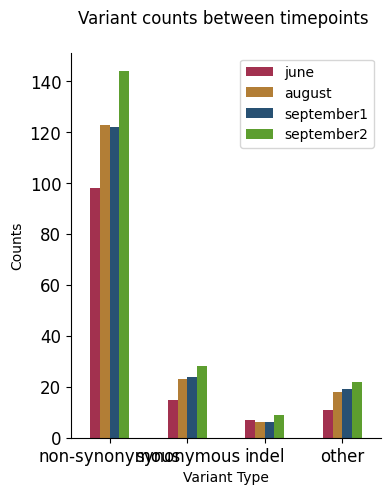

In [109]:
#plt.subplot(2, 1, 1)

panel_b_ann_pivot.plot.bar(x='annotation', y=['june', 'august', 'september1', 'september2'], #kind='bar',
                     color=['#A2314F','#B27E36','#285173', '#5D9E2F'], 
                   figsize=(4,5),
                   rot=0, grid=False, fontsize=12)


plt.xlabel("Variant Type")
plt.ylabel("Counts")
plt.title("Variant counts between timepoints \n")
plt.savefig('figures/variant_counts.png', dpi=600, bbox_inches='tight')
plt.savefig('figures/variant_counts.pdf', dpi=600, bbox_inches='tight')
#plt.savefig('figures/variant_counts.svg', dpi=600, bbox_inches='tight')

plt.show()

In [25]:
# Getting means and stdev for each column

means_data = panel_b_ann_pivot.set_index('annotation')
means_data = means_data[['june', 'august', 'september1', 'september2']]
means_data['means'] = means_data.mean(axis = 1)
means_data['stdev'] = means_data.std(axis = 1)
means_data

,june,august,september1,september2,means,stdev
annotation,,,,,,
non-synonymous,98,123,122,144,121.75,16.284579
synonymous,15,23,24,28,22.50,4.716991
indel,7,6,6,9,7.00,1.224745
other,11,18,19,22,17.50,4.031129


In [110]:
panel_b_change = merged_df[['timepoint','change']]
panel_b_change

panel_b_change_pivot = (pd.pivot_table(panel_b_change, index=['change'], columns=['timepoint'], aggfunc=len, fill_value=0)
       .reset_index()
       .rename_axis(columns=[None]))

panel_b_change_pivot = panel_b_change_pivot[['change', 'june','august', 'september1', 'september2']]

panel_b_change_pivot.loc[panel_b_change_pivot['change'].str.startswith('A>C'), 'order'] = 1
panel_b_change_pivot.loc[panel_b_change_pivot['change'].str.startswith('T>G'), 'order'] = 1
panel_b_change_pivot.loc[panel_b_change_pivot['change'].str.startswith('A>G'), 'order'] = 2
panel_b_change_pivot.loc[panel_b_change_pivot['change'].str.startswith('T>C'), 'order'] = 2
panel_b_change_pivot.loc[panel_b_change_pivot['change'].str.startswith('A>T'), 'order'] = 3
panel_b_change_pivot.loc[panel_b_change_pivot['change'].str.startswith('T>A'), 'order'] = 3
panel_b_change_pivot.loc[panel_b_change_pivot['change'].str.startswith('C>A'), 'order'] = 4
panel_b_change_pivot.loc[panel_b_change_pivot['change'].str.startswith('G>T'), 'order'] = 4
panel_b_change_pivot.loc[panel_b_change_pivot['change'].str.startswith('C>T'), 'order'] = 5
panel_b_change_pivot.loc[panel_b_change_pivot['change'].str.startswith('G>A'), 'order'] = 5
panel_b_change_pivot.loc[panel_b_change_pivot['change'].str.startswith('C>G'), 'order'] = 6
panel_b_change_pivot.loc[panel_b_change_pivot['change'].str.startswith('G>C'), 'order'] = 6
panel_b_change_pivot.loc[panel_b_change_pivot['change'].str.startswith('other'), 'order'] = 7

panel_b_change_pivot = panel_b_change_pivot.sort_values(['order'], ascending=True)
panel_b_change_pivot.head(5)

,change,june,august,september1,september2,order
0,A>C,12,14,10,13,1.0
11,T>G,6,10,12,12,1.0
1,A>G,18,19,20,26,2.0
10,T>C,16,21,20,25,2.0
2,A>T,4,5,5,8,3.0


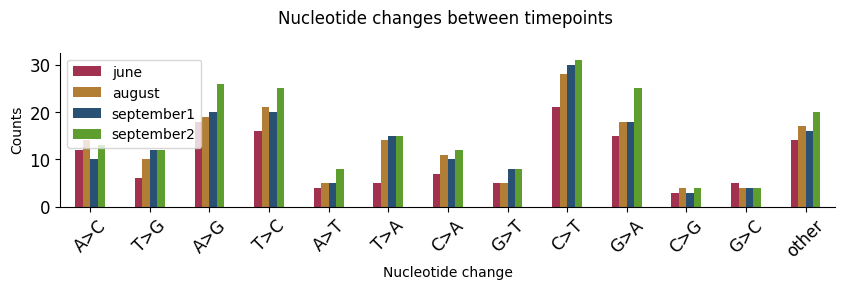

In [111]:
panel_b_change_pivot.plot.bar(x='change', y=['june', 'august','september1', 'september2'], #kind='bar',
                     color=['#A2314F','#B27E36','#285173', '#5D9E2F'], 
                   figsize=(10,2),
                   rot=45, grid=False, fontsize=12)


plt.xlabel("Nucleotide change")
plt.ylabel("Counts")
plt.title("Nucleotide changes between timepoints \n")
plt.savefig('figures/variant_changes_counts.png', dpi=600, bbox_inches='tight')
plt.savefig('figures/variant_changes_counts.pdf', dpi=600, bbox_inches='tight')
#plt.savefig('figures/variant_changes_counts.svg', dpi=600, bbox_inches='tight')

plt.show()

In [112]:
nt_changes = panel_b_change_pivot[['change','june','august','september1', 'september2']]
nt_changes.to_csv('nt_changes_per_month.csv', sep='\t')
nt_changes.head(2)

,change,june,august,september1,september2
0,A>C,12,14,10,13
11,T>G,6,10,12,12


In [113]:
# function to get confidence intervals as suggested by Dr. Katia Koelle
def get_nt_change_ci(exp, control, timepoint, ci):
    df = pd.read_csv('nt_changes_per_month.csv', sep='\t')
    #df = df[['change', 'june', 'august']]
    month_total = df[timepoint].sum()
    df_month = df[['change', timepoint]]
    data_m = []
    experimental_m  = df_month[df_month['change']==exp]
    control_m = df_month[df_month['change']==control]
    data = [experimental_m, control_m]
    data = pd.concat(data)
    data = pd.DataFrame(data)
    data = data.set_index('change')
    data = data.T
    data
    for index, row in data.iterrows():
        result_m = relative_risk(row[0], month_total, row[1], month_total)
        conf_m = result_m.confidence_interval(confidence_level=ci)
        low_m = conf_m.low
        high_m = conf_m.high
        count = row[0]
        data_m.append(
             {
                 'change':exp,
                 'timepoint': timepoint,
                 'count':count,
                 'low_CI_95': low_m,
                 'high_CI_95':high_m,

             })
    change_ci_m = pd.DataFrame(data_m)
    change_ci_m.to_csv('nt_cis/ci_for_'+exp+'_'+timepoint+'.csv', sep='\t')

In [114]:
get_nt_change_ci('A>C', 'C>A', 'june', .95)
get_nt_change_ci('C>A', 'A>C', 'june', .95)

get_nt_change_ci('A>G', 'G>A', 'june', .95)
get_nt_change_ci('G>A', 'A>G', 'june', .95)

get_nt_change_ci('A>T', 'T>A', 'june', .95)
get_nt_change_ci('T>A', 'A>T', 'june', .95)

get_nt_change_ci('C>G', 'G>C', 'june', .95)
get_nt_change_ci('G>C', 'C>G', 'june', .95)

get_nt_change_ci('C>T', 'T>C', 'june', .95)
get_nt_change_ci('T>C', 'C>T', 'june', .95)

get_nt_change_ci('T>G', 'G>T', 'june', .95)
get_nt_change_ci('G>T', 'T>G', 'june', .95)

get_nt_change_ci('A>C', 'C>A', 'august', .95)
get_nt_change_ci('C>A', 'A>C', 'august', .95)

get_nt_change_ci('A>G', 'G>A', 'august', .95)
get_nt_change_ci('G>A', 'A>G', 'august', .95)

get_nt_change_ci('A>T', 'T>A', 'august', .95)
get_nt_change_ci('T>A', 'A>T', 'august', .95)

get_nt_change_ci('C>G', 'G>C', 'august', .95)
get_nt_change_ci('G>C', 'C>G', 'august', .95)

get_nt_change_ci('C>T', 'T>C', 'august', .95)
get_nt_change_ci('T>C', 'C>T', 'august', .95)

get_nt_change_ci('T>G', 'G>T', 'august', .95)
get_nt_change_ci('G>T', 'T>G', 'august', .95)

get_nt_change_ci('A>C', 'C>A', 'september1', .95)
get_nt_change_ci('C>A', 'A>C', 'september1', .95)

get_nt_change_ci('A>G', 'G>A', 'september1', .95)
get_nt_change_ci('G>A', 'A>G', 'september1', .95)

get_nt_change_ci('A>T', 'T>A', 'september1', .95)
get_nt_change_ci('T>A', 'A>T', 'september1', .95)

get_nt_change_ci('C>G', 'G>C', 'september1', .95)
get_nt_change_ci('G>C', 'C>G', 'september1', .95)

get_nt_change_ci('C>T', 'T>C', 'september1', .95)
get_nt_change_ci('T>C', 'C>T', 'september1', .95)

get_nt_change_ci('T>G', 'G>T', 'september1', .95)
get_nt_change_ci('G>T', 'T>G', 'september1', .95)


get_nt_change_ci('A>C', 'C>A', 'september2', .95)
get_nt_change_ci('C>A', 'A>C', 'september2', .95)

get_nt_change_ci('A>G', 'G>A', 'september2', .95)
get_nt_change_ci('G>A', 'A>G', 'september2', .95)

get_nt_change_ci('A>T', 'T>A', 'september2', .95)
get_nt_change_ci('T>A', 'A>T', 'september2', .95)

get_nt_change_ci('C>G', 'G>C', 'september2', .95)
get_nt_change_ci('G>C', 'C>G', 'september2', .95)

get_nt_change_ci('C>T', 'T>C', 'september2', .95)
get_nt_change_ci('T>C', 'C>T', 'september2', .95)

get_nt_change_ci('T>G', 'G>T', 'september2', .95)
get_nt_change_ci('G>T', 'T>G', 'september2', .95)

In [115]:
#concatenate all files into a single dataframe
folder='nt_cis/'
all_files = glob.glob(os.path.join(folder, "**.csv")) 
df_from_each_file = (pd.read_csv(f, sep='\t') for f in all_files)
concatenated_df = pd.concat(df_from_each_file, ignore_index=True)
changes_ci = concatenated_df[['change', 'timepoint', 'count', 'low_CI_95','high_CI_95']]
changes_ci.to_csv('nt_change_ci.csv', sep='\t', index=False)

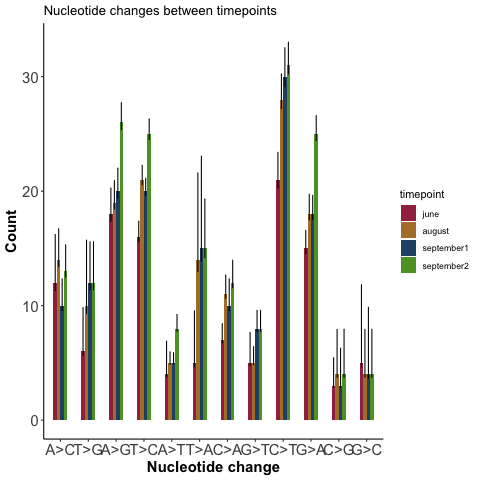

In [116]:
%%R

# load the ggplot2 library
library(ggplot2)

nt_data <- read.table(file = 'nt_change_ci.csv', sep = '\t', header = TRUE)
nt_data <- nt_data[c('change', 'timepoint','count','low_CI_95', 'high_CI_95')]
nt_data$change <- factor(nt_data$change,levels = c('A>C', 'T>G', 'A>G', 'T>C', 'A>T', 'T>A', 'C>A', 
                                                   'G>T', 'C>T', 'G>A','C>G', 'G>C', 'other'))
nt_data$timepoint <- factor(nt_data$timepoint,levels = c('june', 'august','september1', 'september2'))



plot_nt <- ggplot(nt_data, aes(x=change, y=count, fill=timepoint),fig(12,3))+
  geom_bar(width=0.5,position=position_dodge(), stat="identity")+
  geom_errorbar(aes(ymin=count-low_CI_95, ymax=count+high_CI_95),
                width=.1,                    # Width of the error bars
                position=position_dodge(0.5)) +
  scale_color_grey() + theme_classic() +
  scale_fill_manual(values=c('#A2314F','#B27E36','#285173', '#5D9E2F'))+
  labs(title="Nucleotide changes between timepoints", y="Count", x="Nucleotide change") +
  theme(plot.caption=element_text(size=15), axis.title.x=element_text(size=15, face="bold"), axis.title.y=element_text(size=15, face="bold"),
        axis.text.x=element_text(size=15), axis.text.y=element_text(size=15))

ggsave('figures/nt_changes_with_ci.pdf', dpi=300, width = 12, height = 3, units = 'in' ) 
print(plot_nt)
# The figure looks weird here, but it saves in the right format

## Panel D

I will be merging the SNPGenie results with the df containing the counts of syn and non-syn substitutions. I will also use a binomial probability distribution to obtain 95% confidence intervals.  

In [33]:
frames = [june_df, august_df, september_df, september_df2]

merged_df = pd.concat(frames)

panel_b_gene = merged_df[['timepoint','GENE','annotation']]

panel_b_gene_pivot = (pd.pivot_table(panel_b_gene, index=['timepoint', 'GENE'], columns=['annotation'], aggfunc=len, fill_value=0)
       .reset_index()
       .rename_axis(columns=[None]))
panel_b_gene_pivot.loc[panel_b_gene_pivot['GENE'].str.startswith('orf1ab'), 'order'] = 1
panel_b_gene_pivot.loc[panel_b_gene_pivot['GENE'].str.startswith('E'), 'order'] = 5
panel_b_gene_pivot.loc[panel_b_gene_pivot['GENE'].str.endswith('S'), 'order'] = 2
panel_b_gene_pivot.loc[panel_b_gene_pivot['GENE'].str.startswith('S-N'), 'order'] = 3
panel_b_gene_pivot.loc[panel_b_gene_pivot['GENE'].str.startswith('M'), 'order'] = 6
panel_b_gene_pivot.loc[panel_b_gene_pivot['GENE'].str.startswith('N'), 'order'] = 10
panel_b_gene_pivot.loc[panel_b_gene_pivot['GENE'].str.startswith('ORF10'), 'order'] = 11
panel_b_gene_pivot.loc[panel_b_gene_pivot['GENE'].str.startswith('ORF3a'), 'order'] = 4
panel_b_gene_pivot.loc[panel_b_gene_pivot['GENE'].str.startswith('ORF6'), 'order'] = 7
panel_b_gene_pivot.loc[panel_b_gene_pivot['GENE'].str.startswith('ORF7a'), 'order'] = 8
panel_b_gene_pivot.loc[panel_b_gene_pivot['GENE'].str.startswith('ORF8'), 'order'] = 9

panel_b_gene_pivot = panel_b_gene_pivot.sort_values(['timepoint','order'], ascending=[False, True])
panel_b_gene_pivot_jun = panel_b_gene_pivot[panel_b_gene_pivot['timepoint']=='june']
panel_b_gene_pivot_aug = panel_b_gene_pivot[panel_b_gene_pivot['timepoint']=='august']
panel_b_gene_pivot_sep1 = panel_b_gene_pivot[panel_b_gene_pivot['timepoint']=='september1']
panel_b_gene_pivot_sep2 = panel_b_gene_pivot[panel_b_gene_pivot['timepoint']=='september2']




In [35]:
panel_b_gene_pivot_jun

,timepoint,GENE,indel,non-synonymous,other,synonymous,order
17,june,orf1ab,4,41,9,11,1.0
15,june,S,1,32,1,0,2.0
16,june,S-Nterminal,1,10,0,1,3.0
11,june,ORF3a,0,5,0,1,4.0
9,june,M,1,4,0,0,6.0
12,june,ORF6,0,1,0,0,7.0
13,june,ORF7a,0,1,0,0,8.0
14,june,ORF8,0,0,1,0,9.0
10,june,N,0,4,0,2,10.0


In [36]:
panel_b_gene_pivot_aug

,timepoint,GENE,indel,non-synonymous,other,synonymous,order
8,august,orf1ab,2,51,13,18,1.0
6,august,S,1,39,3,1,2.0
7,august,S-Nterminal,1,15,0,1,3.0
2,august,ORF3a,0,6,0,1,4.0
0,august,M,1,4,0,0,6.0
3,august,ORF6,0,1,0,0,7.0
4,august,ORF7a,0,2,0,0,8.0
5,august,ORF8,1,0,2,0,9.0
1,august,N,0,5,0,2,10.0


In [37]:
panel_b_gene_pivot_sep1

,timepoint,GENE,indel,non-synonymous,other,synonymous,order
27,september1,orf1ab,3,56,14,21,1.0
25,september1,S,0,36,4,1,2.0
26,september1,S-Nterminal,1,12,0,0,3.0
21,september1,ORF3a,0,6,0,0,4.0
18,september1,E,0,0,1,0,5.0
19,september1,M,1,4,0,0,6.0
22,september1,ORF6,0,1,0,0,7.0
23,september1,ORF7a,0,2,0,0,8.0
24,september1,ORF8,1,0,0,0,9.0
20,september1,N,0,5,0,2,10.0


In [38]:
panel_b_gene_pivot_sep2

,timepoint,GENE,indel,non-synonymous,other,synonymous,order
37,september2,orf1ab,4,60,13,21,1.0
35,september2,S,1,48,7,1,2.0
36,september2,S-Nterminal,1,15,0,1,3.0
31,september2,ORF3a,0,7,0,2,4.0
28,september2,E,0,0,1,0,5.0
29,september2,M,1,4,0,0,6.0
32,september2,ORF6,0,1,0,0,7.0
33,september2,ORF7a,0,2,0,0,8.0
34,september2,ORF8,1,0,0,0,9.0
30,september2,N,1,7,1,3,10.0


In [351]:
june_timepoint = pd.read_csv('ivar_intersection/june16/june16_SNPGenie_Results/SNPGenie_Results/product_results.txt', sep='\t')

june_timepoint.loc[june_timepoint['product'].str.startswith('gene-orf1ab'), 'GENE'] = 'orf1ab'
june_timepoint.loc[june_timepoint['product'].str.startswith('gene-E'), 'GENE'] = 'E'
june_timepoint.loc[june_timepoint['product'].str.endswith('gene-S'), 'GENE'] = 'S'
june_timepoint.loc[june_timepoint['product'].str.startswith('gene-S_Nterminal'), 'GENE'] = 'S-Nterminal'
june_timepoint.loc[june_timepoint['product'].str.startswith('gene-M'), 'GENE'] = 'M'
june_timepoint.loc[june_timepoint['product'].str.startswith('gene-N'), 'GENE'] = 'N'
june_timepoint.loc[june_timepoint['product'].str.startswith('gene-ORF10'), 'GENE'] = 'ORF10'
june_timepoint.loc[june_timepoint['product'].str.startswith('gene-ORF3a'), 'GENE'] = 'ORF3a'
june_timepoint.loc[june_timepoint['product'].str.startswith('gene-ORF6'), 'GENE'] = 'ORF6'
june_timepoint.loc[june_timepoint['product'].str.startswith('gene-ORF7a'), 'GENE'] = 'ORF7a'
june_timepoint.loc[june_timepoint['product'].str.startswith('gene-ORF8'), 'GENE'] = 'ORF8'

june_timepoint = june_timepoint[['GENE', 'N_sites', 'S_sites']]

june_per_site = pd.merge(panel_b_gene_pivot_jun, june_timepoint,how='outer')
june_per_site['timepoint'] = 'june'
june_per_site = june_per_site.fillna(0)

june_per_site['N_per_site_j'] = june_per_site['non-synonymous']/june_per_site['N_sites']
june_per_site['S_per_site_j'] = june_per_site['synonymous']/june_per_site['S_sites']

june_per_site.to_csv('ivar_intersection/june16/muts_per_site_june.csv', sep = '\t')

june_per_site = june_per_site[['timepoint', 'GENE', 'indel','N_per_site_j', 'S_per_site_j','order']]



In [352]:
august_timepoint = pd.read_csv('ivar_intersection/august16/august16_SNPGenie_Results/SNPGenie_Results/product_results.txt', sep='\t')

august_timepoint.loc[august_timepoint['product'].str.startswith('gene-orf1ab'), 'GENE'] = 'orf1ab'
august_timepoint.loc[august_timepoint['product'].str.startswith('gene-E'), 'GENE'] = 'E'
august_timepoint.loc[august_timepoint['product'].str.endswith('gene-S'), 'GENE'] = 'S'
august_timepoint.loc[august_timepoint['product'].str.startswith('gene-S_Nterminal'), 'GENE'] = 'S-Nterminal'
august_timepoint.loc[august_timepoint['product'].str.startswith('gene-M'), 'GENE'] = 'M'
august_timepoint.loc[august_timepoint['product'].str.startswith('gene-N'), 'GENE'] = 'N'
august_timepoint.loc[august_timepoint['product'].str.startswith('gene-ORF10'), 'GENE'] = 'ORF10'
august_timepoint.loc[august_timepoint['product'].str.startswith('gene-ORF3a'), 'GENE'] = 'ORF3a'
august_timepoint.loc[august_timepoint['product'].str.startswith('gene-ORF6'), 'GENE'] = 'ORF6'
august_timepoint.loc[august_timepoint['product'].str.startswith('gene-ORF7a'), 'GENE'] = 'ORF7a'
august_timepoint.loc[august_timepoint['product'].str.startswith('gene-ORF8'), 'GENE'] = 'ORF8'

august_timepoint = august_timepoint[['GENE', 'N_sites', 'S_sites']]

august_per_site = pd.merge(panel_b_gene_pivot_aug, august_timepoint,how='outer')
august_per_site['timepoint'] = 'august'
august_per_site = august_per_site.fillna(0)

august_per_site['N_per_site_j'] = august_per_site['non-synonymous']/august_per_site['N_sites']
august_per_site['S_per_site_j'] = august_per_site['synonymous']/august_per_site['S_sites']

august_per_site.to_csv('ivar_intersection/august16/muts_per_site_august.csv', sep = '\t')

august_per_site = august_per_site[['timepoint', 'GENE', 'indel','N_per_site_j', 'S_per_site_j','order']]

In [379]:
september1_timepoint = pd.read_csv('ivar_intersection/september23/september23_SNPGenie_Results/SNPGenie_Results/product_results.txt', sep='\t')

september1_timepoint.loc[september1_timepoint['product'].str.startswith('gene-orf1ab'), 'GENE'] = 'orf1ab'
september1_timepoint.loc[september1_timepoint['product'].str.startswith('gene-E'), 'GENE'] = 'E'
september1_timepoint.loc[september1_timepoint['product'].str.endswith('gene-S'), 'GENE'] = 'S'
september1_timepoint.loc[september1_timepoint['product'].str.startswith('gene-S_Nterminal'), 'GENE'] = 'S-Nterminal'
september1_timepoint.loc[september1_timepoint['product'].str.startswith('gene-M'), 'GENE'] = 'M'
september1_timepoint.loc[september1_timepoint['product'].str.startswith('gene-N'), 'GENE'] = 'N'
september1_timepoint.loc[september1_timepoint['product'].str.startswith('gene-ORF10'), 'GENE'] = 'ORF10'
september1_timepoint.loc[september1_timepoint['product'].str.startswith('gene-ORF3a'), 'GENE'] = 'ORF3a'
september1_timepoint.loc[september1_timepoint['product'].str.startswith('gene-ORF6'), 'GENE'] = 'ORF6'
september1_timepoint.loc[september1_timepoint['product'].str.startswith('gene-ORF7a'), 'GENE'] = 'ORF7a'
september1_timepoint.loc[september1_timepoint['product'].str.startswith('gene-ORF8'), 'GENE'] = 'ORF8'

september1_timepoint = september1_timepoint[['GENE', 'N_sites', 'S_sites']]

# september1_per_site = pd.merge(panel_b_gene_pivot_sep1, september1_timepoint,how='outer')
# september1_per_site['timepoint'] = 'september1'
# september1_per_site = september1_per_site.fillna(0)

# september1_per_site['N_per_site_j'] = september1_per_site['non-synonymous']/september1_per_site['N_sites']
# september1_per_site['S_per_site_j'] = september1_per_site['synonymous']/september1_per_site['S_sites']

# september1_per_site.to_csv('ivar_intersection/september23/muts_per_site_september1.csv', sep = '\t')

# september1_per_site = september1_per_site[['timepoint', 'GENE', 'indel','N_per_site_j', 'S_per_site_j','order']]

panel_b_gene_pivot_sep1


,timepoint,GENE,indel,non-synonymous,other,synonymous,order
27,september1,orf1ab,3,56,14,21,1.0
25,september1,S,0,36,4,1,2.0
26,september1,S-Nterminal,1,12,0,0,3.0
21,september1,ORF3a,0,6,0,0,4.0
18,september1,E,0,0,1,0,5.0
19,september1,M,1,4,0,0,6.0
22,september1,ORF6,0,1,0,0,7.0
23,september1,ORF7a,0,2,0,0,8.0
24,september1,ORF8,1,0,0,0,9.0
20,september1,N,0,5,0,2,10.0


In [354]:
september2_timepoint = pd.read_csv('ivar_intersection/september27/september27_SNPGenie_Results/SNPGenie_Results/product_results.txt', sep='\t')

september2_timepoint.loc[september2_timepoint['product'].str.startswith('gene-orf1ab'), 'GENE'] = 'orf1ab'
september2_timepoint.loc[september2_timepoint['product'].str.startswith('gene-E'), 'GENE'] = 'E'
september2_timepoint.loc[september2_timepoint['product'].str.endswith('gene-S'), 'GENE'] = 'S'
september2_timepoint.loc[september2_timepoint['product'].str.startswith('gene-S_Nterminal'), 'GENE'] = 'S-Nterminal'
september2_timepoint.loc[september2_timepoint['product'].str.startswith('gene-M'), 'GENE'] = 'M'
september2_timepoint.loc[september2_timepoint['product'].str.startswith('gene-N'), 'GENE'] = 'N'
september2_timepoint.loc[september2_timepoint['product'].str.startswith('gene-ORF10'), 'GENE'] = 'ORF10'
september2_timepoint.loc[september2_timepoint['product'].str.startswith('gene-ORF3a'), 'GENE'] = 'ORF3a'
september2_timepoint.loc[september2_timepoint['product'].str.startswith('gene-ORF6'), 'GENE'] = 'ORF6'
september2_timepoint.loc[september2_timepoint['product'].str.startswith('gene-ORF7a'), 'GENE'] = 'ORF7a'
september2_timepoint.loc[september2_timepoint['product'].str.startswith('gene-ORF8'), 'GENE'] = 'ORF8'

september2_timepoint = september2_timepoint[['GENE', 'N_sites', 'S_sites']]

september2_per_site = pd.merge(panel_b_gene_pivot_sep2, september2_timepoint,how='outer')
september2_per_site['timepoint'] = 'september2'
september2_per_site = september2_per_site.fillna(0)

september2_per_site['N_per_site_j'] = september2_per_site['non-synonymous']/september2_per_site['N_sites']
september2_per_site['S_per_site_j'] = september2_per_site['synonymous']/september2_per_site['S_sites']

september2_per_site.to_csv('ivar_intersection/september27/muts_per_site_september2.csv', sep = '\t')

september2_per_site = september2_per_site[['timepoint', 'GENE', 'indel','N_per_site_j', 'S_per_site_j','order']]

In [355]:
# non_syn
def getting_95_ci_nsyn(path,file, ci):
    
    df= pd.read_csv(path+file, sep='\t')
    df = df[['timepoint','GENE', 'non-synonymous','N_sites', 'synonymous','S_sites']]
    df.N_sites = df.N_sites.round()
    df.N_sites = df.N_sites.astype(int)
    df.S_sites = df.S_sites.round()
    df.S_sites = df.S_sites.astype(int)
    df['non-synonymous'] = df['non-synonymous'].astype(int)
    df.synonymous = df.synonymous.astype(int)
    #print(df)
    data = []
    for index, row in df.iterrows():
        #print(row[2], row[3])
        result = binomtest(row[2], row[3])
        conf = result.proportion_ci(confidence_level=ci)
        low = conf.low
        high = conf.high
        sample = row[0] 
        gene = row[1]
        data.append(
        {
            'timepoint':sample,
            'gene':gene,
            'low (ci 95%)ns': low,
            'high (ci 95%)ns':high
            
        })
        
    frame_timepoint = pd.DataFrame(data)
    #print(frame_timepoint)
    frame_timepoint.to_csv(path+'confidence_intervals_per_gene_nonsyn.csv', sep='\t')

        
# syn
def getting_95_ci_syn(path,file, ci):
   
    df= pd.read_csv(path+file, sep='\t')
    df = df[['timepoint','GENE', 'non-synonymous','N_sites', 'synonymous','S_sites']]
    df.N_sites = df.N_sites.round()
    df.N_sites = df.N_sites.astype(int)
    df.S_sites = df.S_sites.round()
    df.S_sites = df.S_sites.astype(int)
    df['non-synonymous'] = df['non-synonymous'].astype(int)
    df.synonymous = df.synonymous.astype(int)
    #print(df)
    data = []
    for index, row in df.iterrows():
        #print(row[2], row[3])
        result = binomtest(row[4], row[5])
        conf = result.proportion_ci(confidence_level=ci)
        low = conf.low
        high = conf.high
        sample = row[0] 
        gene = row[1]
        data.append(
        {
            'timepoint':sample,
            'gene':gene,
            'low (ci 95%)s': low,
            'high (ci 95%)s':high
            
        })
        
    frame_timepoint = pd.DataFrame(data)
    #print(frame_timepoint)
    frame_timepoint.to_csv(path+'confidence_intervals_per_gene_syn.csv', sep='\t')

        
      

In [356]:
getting_95_ci_syn('ivar_intersection/june16/','muts_per_site_june.csv', 0.95)
getting_95_ci_syn('ivar_intersection/august16/','muts_per_site_august.csv', 0.95)
getting_95_ci_syn('ivar_intersection/september23/','muts_per_site_september1.csv', 0.95)
getting_95_ci_syn('ivar_intersection/september27/','muts_per_site_september2.csv', 0.95)


getting_95_ci_nsyn('ivar_intersection/june16/','muts_per_site_june.csv', 0.95)
getting_95_ci_nsyn('ivar_intersection/august16/','muts_per_site_august.csv', 0.95)
getting_95_ci_nsyn('ivar_intersection/september23/','muts_per_site_september1.csv', 0.95)
getting_95_ci_nsyn('ivar_intersection/september27/','muts_per_site_september2.csv', 0.95)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:73: RuntimeWarning: divide by zero encountered in _binom_cdf
  return _boost._binom_cdf(k, n, p)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:73: RuntimeWarning: divide by zero encountered in _binom_cdf
  return _boost._binom_cdf(k, n, p)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:73: RuntimeWarning: divide by zero encountered in _binom_cdf
  return _boost._binom_cdf(k, n, p)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:73: RuntimeWarning: divide by zero encountered in _binom_cdf
  return _boost._binom_cdf(k, n, p)


In [357]:
jun_syn_ci = pd.read_csv('ivar_intersection/june16/confidence_intervals_per_gene_syn.csv', sep='\t')
jun_nsyn_ci = pd.read_csv('ivar_intersection/june16/confidence_intervals_per_gene_nonsyn.csv', sep='\t')

june_ci = pd.merge(jun_syn_ci,jun_nsyn_ci, how='inner', on=['timepoint','gene'])

june_ci.rename(columns={'low (ci 95%)s':'low_ci_95_syn', 'high (ci 95%)s':'high_ci_95_syn',
                          'low (ci 95%)ns':'low_ci_95_nsyn', 'high (ci 95%)ns':'high_ci_95_nsyn',
                          'gene':'GENE'}, inplace=True)
june_ci = june_ci[['timepoint', 'GENE', 'low_ci_95_syn', 'high_ci_95_syn',
                      'low_ci_95_nsyn', 'high_ci_95_nsyn']]
june_ci.head(3)

,timepoint,GENE,low_ci_95_syn,high_ci_95_syn,low_ci_95_nsyn,high_ci_95_nsyn
0,june,orf1ab,0.001117,0.003999,0.001798,0.003396
1,june,S,0.000000,0.004122,0.007492,0.015404
2,june,S-Nterminal,0.000125,0.027272,0.007169,0.027236


In [358]:
aug_syn_ci = pd.read_csv('ivar_intersection/august16/confidence_intervals_per_gene_syn.csv', sep='\t')
aug_nsyn_ci = pd.read_csv('ivar_intersection/august16/confidence_intervals_per_gene_nonsyn.csv', sep='\t')

august_ci = pd.merge(aug_syn_ci,aug_nsyn_ci, how='inner', on=['timepoint','gene'])

august_ci.rename(columns={'low (ci 95%)s':'low_ci_95_syn', 'high (ci 95%)s':'high_ci_95_syn',
                          'low (ci 95%)ns':'low_ci_95_nsyn', 'high (ci 95%)ns':'high_ci_95_nsyn',
                          'gene':'GENE'}, inplace=True)
august_ci = august_ci[['timepoint', 'GENE', 'low_ci_95_syn', 'high_ci_95_syn',
                      'low_ci_95_nsyn', 'high_ci_95_nsyn']]
august_ci.head(3)

,timepoint,GENE,low_ci_95_syn,high_ci_95_syn,low_ci_95_nsyn,high_ci_95_nsyn
0,august,orf1ab,0.002171,0.005778,0.002321,0.004095
1,august,S,0.000028,0.006216,0.009498,0.018182
2,august,S-Nterminal,0.000125,0.027272,0.012564,0.036603


In [359]:
sep1_syn_ci = pd.read_csv('ivar_intersection/september23/confidence_intervals_per_gene_syn.csv', sep='\t')
sep1_nsyn_ci = pd.read_csv('ivar_intersection/september23/confidence_intervals_per_gene_nonsyn.csv', sep='\t')

september1_ci = pd.merge(sep1_syn_ci,sep1_nsyn_ci, how='inner', on=['timepoint','gene'])

september1_ci.rename(columns={'low (ci 95%)s':'low_ci_95_syn', 'high (ci 95%)s':'high_ci_95_syn',
                          'low (ci 95%)ns':'low_ci_95_nsyn', 'high (ci 95%)ns':'high_ci_95_nsyn',
                          'gene':'GENE'}, inplace=True)
september1_ci = september1_ci[['timepoint', 'GENE', 'low_ci_95_syn', 'high_ci_95_syn',
                      'low_ci_95_nsyn', 'high_ci_95_nsyn']]
september1_ci.head(3)

,timepoint,GENE,low_ci_95_syn,high_ci_95_syn,low_ci_95_nsyn,high_ci_95_nsyn
0,september1,orf1ab,0.002645,0.006518,0.002585,0.004441
1,september1,S,0.000028,0.006203,0.008641,0.017010
2,september1,S-Nterminal,0.000000,0.017920,0.009302,0.031123


In [360]:
sep2_syn_ci = pd.read_csv('ivar_intersection/september27/confidence_intervals_per_gene_syn.csv', sep='\t')
sep2_nsyn_ci = pd.read_csv('ivar_intersection/september27/confidence_intervals_per_gene_nonsyn.csv', sep='\t')

september2_ci = pd.merge(sep2_syn_ci,sep2_nsyn_ci, how='inner', on=['timepoint','gene'])

september2_ci.rename(columns={'low (ci 95%)s':'low_ci_95_syn', 'high (ci 95%)s':'high_ci_95_syn',
                          'low (ci 95%)ns':'low_ci_95_nsyn', 'high (ci 95%)ns':'high_ci_95_nsyn',
                          'gene':'GENE'}, inplace=True)
september2_ci = september2_ci[['timepoint', 'GENE', 'low_ci_95_syn', 'high_ci_95_syn',
                      'low_ci_95_nsyn', 'high_ci_95_nsyn']]
september2_ci.head(3)

,timepoint,GENE,low_ci_95_syn,high_ci_95_syn,low_ci_95_nsyn,high_ci_95_nsyn
0,september2,orf1ab,0.002645,0.006518,0.002798,0.004716
1,september2,S,0.000028,0.006223,0.012120,0.021692
2,september2,S-Nterminal,0.000125,0.027272,0.012564,0.036603


In [361]:
aug_with_ci = pd.merge(august_per_site,august_ci, how='inner', on=['timepoint','GENE'])
jun_with_ci = pd.merge(june_per_site,june_ci, how='inner', on=['timepoint','GENE'])
sep1_with_ci = pd.merge(september1_per_site,september1_ci, how='inner', on=['timepoint','GENE'])
sep2_with_ci = pd.merge(september2_per_site,september2_ci, how='inner', on=['timepoint','GENE'])


aug_with_ci.rename(columns={'N_per_site_j':'N_per_site', 'S_per_site_j':'S_per_site'}, inplace=True)
jun_with_ci.rename(columns={'N_per_site_j':'N_per_site', 'S_per_site_j':'S_per_site'}, inplace=True)
sep1_with_ci.rename(columns={'N_per_site_j':'N_per_site', 'S_per_site_j':'S_per_site'}, inplace=True)
sep2_with_ci.rename(columns={'N_per_site_j':'N_per_site', 'S_per_site_j':'S_per_site'}, inplace=True)

aug_with_ci.to_csv('ivar_intersection/june16/per_site_values_with_ci_june16.csv',sep='\t')
jun_with_ci.to_csv('ivar_intersection/august16/per_site_values_with_ci_august16.csv',sep='\t')
sep1_with_ci.to_csv('ivar_intersection/september23/per_site_values_with_ci_september23.csv',sep='\t')
sep2_with_ci.to_csv('ivar_intersection/september27/per_site_values_with_ci_september27.csv',sep='\t')



In [362]:
merged_per_site = pd.merge(aug_with_ci, jun_with_ci,how='outer')
merged_per_site = pd.merge(merged_per_site, sep1_with_ci,how='outer')
merged_per_site = pd.merge(merged_per_site, sep2_with_ci,how='outer')

merged_per_site['sterr_N'] = (merged_per_site['high_ci_95_nsyn']-merged_per_site['low_ci_95_nsyn'])/3.92
merged_per_site['sterr_S'] = (merged_per_site['high_ci_95_syn']-merged_per_site['low_ci_95_syn'])/3.92

merged_per_site.head(11)

,timepoint,GENE,indel,N_per_site,S_per_site,order,low_ci_95_syn,high_ci_95_syn,low_ci_95_nsyn,high_ci_95_nsyn,sterr_N,sterr_S
0,august,orf1ab,2.0,0.003116,0.003660,1.0,0.002171,0.005778,0.002321,0.004095,0.000453,0.000920
1,august,S,1.0,0.013332,0.001119,2.0,0.000028,0.006216,0.009498,0.018182,0.002215,0.001579
2,august,S-Nterminal,1.0,0.022371,0.004938,3.0,0.000125,0.027272,0.012564,0.036603,0.006132,0.006925
3,august,ORF3a,0.0,0.009551,0.005081,4.0,0.000129,0.027956,0.003514,0.020679,0.004379,0.007099
4,august,M,1.0,0.007944,0.000000,6.0,0.000000,0.022514,0.002167,0.020195,0.004599,0.005743
5,august,ORF6,0.0,0.006849,0.000000,7.0,0.000000,0.094891,0.000173,0.037570,0.009540,0.024207
6,august,ORF7a,0.0,0.007298,0.000000,8.0,0.000000,0.040601,0.000885,0.026117,0.006437,0.010357
7,august,ORF8,1.0,0.000000,0.000000,9.0,0.000000,0.043989,0.000000,0.013088,0.003339,0.011222
8,august,N,0.0,0.005215,0.006705,10.0,0.000814,0.024032,0.001695,0.012125,0.002661,0.005923
9,august,E,0.0,0.000000,0.000000,0.0,0.000000,0.058681,0.000000,0.022242,0.005674,0.014970


In [364]:
jun_syn_ci = pd.read_csv('ivar_intersection/june16/confidence_intervals_per_gene_syn.csv', sep='\t')
jun_nsyn_ci = pd.read_csv('ivar_intersection/june16/confidence_intervals_per_gene_nonsyn.csv', sep='\t')

jun_syn_ci.rename(columns={'low (ci 95%)s':'low_ci_95', 'high (ci 95%)s':'high_ci_95',
                          'gene':'GENE'}, inplace=True)
jun_nsyn_ci.rename(columns={'low (ci 95%)ns':'low_ci_95', 'high (ci 95%)ns':'high_ci_95',
                          'gene':'GENE'}, inplace=True)
jun_syn_ci['type'] = 'synonymous'
jun_nsyn_ci['type'] = 'nonsynonymous'

june_ci = pd.concat([jun_syn_ci,jun_nsyn_ci], axis=0)



In [365]:

aug_syn_ci = pd.read_csv('ivar_intersection/august16/confidence_intervals_per_gene_syn.csv', sep='\t')
aug_nsyn_ci = pd.read_csv('ivar_intersection/august16/confidence_intervals_per_gene_nonsyn.csv', sep='\t')

aug_syn_ci.rename(columns={'low (ci 95%)s':'low_ci_95', 'high (ci 95%)s':'high_ci_95',
                          'gene':'GENE'}, inplace=True)
aug_nsyn_ci.rename(columns={'low (ci 95%)ns':'low_ci_95', 'high (ci 95%)ns':'high_ci_95',
                          'gene':'GENE'}, inplace=True)
aug_syn_ci['type'] = 'synonymous'
aug_nsyn_ci['type'] = 'nonsynonymous'

august_ci = pd.concat([aug_syn_ci,aug_nsyn_ci], axis=0)



In [366]:

sep1_syn_ci = pd.read_csv('ivar_intersection/september23/confidence_intervals_per_gene_syn.csv', sep='\t')
sep1_nsyn_ci = pd.read_csv('ivar_intersection/september23/confidence_intervals_per_gene_nonsyn.csv', sep='\t')

sep1_syn_ci.rename(columns={'low (ci 95%)s':'low_ci_95', 'high (ci 95%)s':'high_ci_95',
                          'gene':'GENE'}, inplace=True)
sep1_nsyn_ci.rename(columns={'low (ci 95%)ns':'low_ci_95', 'high (ci 95%)ns':'high_ci_95',
                          'gene':'GENE'}, inplace=True)
sep1_syn_ci['type'] = 'synonymous'
sep1_nsyn_ci['type'] = 'nonsynonymous'

september1_ci = pd.concat([sep1_syn_ci,sep1_nsyn_ci], axis=0)



In [367]:

sep2_syn_ci = pd.read_csv('ivar_intersection/september27/confidence_intervals_per_gene_syn.csv', sep='\t')
sep2_nsyn_ci = pd.read_csv('ivar_intersection/september27/confidence_intervals_per_gene_nonsyn.csv', sep='\t')

sep2_syn_ci.rename(columns={'low (ci 95%)s':'low_ci_95', 'high (ci 95%)s':'high_ci_95',
                          'gene':'GENE'}, inplace=True)
sep2_nsyn_ci.rename(columns={'low (ci 95%)ns':'low_ci_95', 'high (ci 95%)ns':'high_ci_95',
                          'gene':'GENE'}, inplace=True)
sep2_syn_ci['type'] = 'synonymous'
sep2_nsyn_ci['type'] = 'nonsynonymous'

september2_ci = pd.concat([sep2_syn_ci,sep2_nsyn_ci], axis=0)



In [368]:
timepoints_ci = pd.concat([june_ci,august_ci, september1_ci, september2_ci], axis=0)
timepoints_ci = timepoints_ci[['timepoint','type', 'GENE', 'low_ci_95', 'high_ci_95']]
timepoints_ci['sample'] = timepoints_ci['timepoint'] + '_' + timepoints_ci['type']
timepoints_ci

timepoints_ci.to_csv('ivar_intersection/timepoints_all_ci.csv', sep='\t')

In [371]:
jun_with_ci = jun_with_ci[['timepoint', 'GENE', 'N_per_site', 'S_per_site']]
jun_with_ci_s = jun_with_ci[['timepoint', 'GENE', 'S_per_site']]
jun_with_ci_ns = jun_with_ci[['timepoint', 'GENE', 'N_per_site']]

jun_with_ci_s['type'] = 'synonymous'
jun_with_ci_s['sample'] = jun_with_ci_s['timepoint'] + '_' + jun_with_ci_s['type']
jun_with_ci_s.rename(columns={'S_per_site':'per_site_value'}, inplace=True)

jun_with_ci_ns['type'] = 'nonsynonymous'
jun_with_ci_ns['sample'] = jun_with_ci_ns['timepoint'] + '_' + jun_with_ci_ns['type']
jun_with_ci_ns.rename(columns={'N_per_site':'per_site_value'}, inplace=True)

values_jun_ci = pd.concat([jun_with_ci_s,jun_with_ci_ns], axis=0)
values_jun_ci.head(3)

,timepoint,GENE,per_site_value,type,sample
0,june,orf1ab,0.002237,synonymous,june_synonymous
1,june,S,0.000000,synonymous,june_synonymous
2,june,S-Nterminal,0.004951,synonymous,june_synonymous


In [372]:
aug_with_ci = aug_with_ci[['timepoint', 'GENE', 'N_per_site', 'S_per_site']]
aug_with_ci_s = aug_with_ci[['timepoint', 'GENE', 'S_per_site']]
aug_with_ci_ns = aug_with_ci[['timepoint', 'GENE', 'N_per_site']]

aug_with_ci_s['type'] = 'synonymous'
aug_with_ci_s['sample'] = aug_with_ci_s['timepoint'] + '_' + aug_with_ci_s['type']
aug_with_ci_s.rename(columns={'S_per_site':'per_site_value'}, inplace=True)

aug_with_ci_ns['type'] = 'nonsynonymous'
aug_with_ci_ns['sample'] = aug_with_ci_ns['timepoint'] + '_' + aug_with_ci_ns['type']
aug_with_ci_ns.rename(columns={'N_per_site':'per_site_value'}, inplace=True)

values_aug_ci = pd.concat([aug_with_ci_s,aug_with_ci_ns], axis=0)
values_aug_ci.head(3)

,timepoint,GENE,per_site_value,type,sample
0,august,orf1ab,0.003660,synonymous,august_synonymous
1,august,S,0.001119,synonymous,august_synonymous
2,august,S-Nterminal,0.004938,synonymous,august_synonymous


In [373]:
sep1_with_ci = sep1_with_ci[['timepoint', 'GENE', 'N_per_site', 'S_per_site']]
sep1_with_ci_s = sep1_with_ci[['timepoint', 'GENE', 'S_per_site']]
sep1_with_ci_ns = sep1_with_ci[['timepoint', 'GENE', 'N_per_site']]

sep1_with_ci_s['type'] = 'synonymous'
sep1_with_ci_s['sample'] = sep1_with_ci_s['timepoint'] + '_' + sep1_with_ci_s['type']
sep1_with_ci_s.rename(columns={'S_per_site':'per_site_value'}, inplace=True)

sep1_with_ci_ns['type'] = 'nonsynonymous'
sep1_with_ci_ns['sample'] = sep1_with_ci_ns['timepoint'] + '_' + sep1_with_ci_ns['type']
sep1_with_ci_ns.rename(columns={'N_per_site':'per_site_value'}, inplace=True)

values_sep1_ci = pd.concat([sep1_with_ci_s,sep1_with_ci_ns], axis=0)
values_sep1_ci.head(3)

,timepoint,GENE,per_site_value,type,sample
0,september1,orf1ab,0.004269,synonymous,september1_synonymous
1,september1,S,0.001116,synonymous,september1_synonymous
2,september1,S-Nterminal,0.000000,synonymous,september1_synonymous


In [374]:
sep2_with_ci = sep2_with_ci[['timepoint', 'GENE', 'N_per_site', 'S_per_site']]
sep2_with_ci_s = sep2_with_ci[['timepoint', 'GENE', 'S_per_site']]
sep2_with_ci_ns = sep2_with_ci[['timepoint', 'GENE', 'N_per_site']]

sep2_with_ci_s['type'] = 'synonymous'
sep2_with_ci_s['sample'] = sep2_with_ci_s['timepoint'] + '_' + sep2_with_ci_s['type']
sep2_with_ci_s.rename(columns={'S_per_site':'per_site_value'}, inplace=True)

sep2_with_ci_ns['type'] = 'nonsynonymous'
sep2_with_ci_ns['sample'] = sep2_with_ci_ns['timepoint'] + '_' + sep2_with_ci_ns['type']
sep2_with_ci_ns.rename(columns={'N_per_site':'per_site_value'}, inplace=True)

values_sep2_ci = pd.concat([sep2_with_ci_s,sep2_with_ci_ns], axis=0)
values_sep2_ci.head(3)

,timepoint,GENE,per_site_value,type,sample
0,september2,orf1ab,0.004269,synonymous,september2_synonymous
1,september2,S,0.001120,synonymous,september2_synonymous
2,september2,S-Nterminal,0.004945,synonymous,september2_synonymous


In [387]:
values_ci = pd.concat([values_jun_ci,values_aug_ci, values_sep1_ci, values_sep2_ci], axis=0)

values_ci = values_ci[['timepoint','sample','type', 'GENE', 'per_site_value']]
values_ci.to_csv('values_all_per_site.csv', sep='\t')
values_ci

,timepoint,sample,type,GENE,per_site_value
0,june,june_synonymous,synonymous,orf1ab,0.002237
1,june,june_synonymous,synonymous,S,0.000000
2,june,june_synonymous,synonymous,S-Nterminal,0.004951
3,june,june_synonymous,synonymous,ORF3a,0.005085
4,june,june_synonymous,synonymous,M,0.000000
...,...,...,...,...,...
6,september2,september2_nonsynonymous,nonsynonymous,ORF6,0.006849
7,september2,september2_nonsynonymous,nonsynonymous,ORF7a,0.007299
8,september2,september2_nonsynonymous,nonsynonymous,ORF8,0.000000
9,september2,september2_nonsynonymous,nonsynonymous,N,0.007301


In [388]:
final_table = pd.merge(values_ci,timepoints_ci, how='inner', on=['timepoint','GENE','type','sample'])
final_table = final_table[[ 'sample', 'GENE', 'per_site_value', 'low_ci_95',
       'high_ci_95']]

final_table.loc[final_table['per_site_value'] == 0, 'low_ci_95'] = 0
final_table.loc[final_table['per_site_value'] == 0, 'high_ci_95'] = 0
final_table.to_csv('ivar_intersection/final_table_with_ci.csv', sep='\t')

final_table.tail(60)

,sample,GENE,per_site_value,low_ci_95,high_ci_95
28,august_synonymous,ORF7a,0.000000,0.000000,0.000000
29,august_synonymous,ORF8,0.000000,0.000000,0.000000
30,august_synonymous,N,0.006705,0.000814,0.024032
31,august_synonymous,E,0.000000,0.000000,0.000000
32,august_synonymous,ORF10,0.000000,0.000000,0.000000
33,august_nonsynonymous,orf1ab,0.003116,0.002321,0.004095
34,august_nonsynonymous,S,0.013332,0.009498,0.018182
35,august_nonsynonymous,S-Nterminal,0.022371,0.012564,0.036603
36,august_nonsynonymous,ORF3a,0.009551,0.003514,0.020679
37,august_nonsynonymous,M,0.007944,0.002167,0.020195


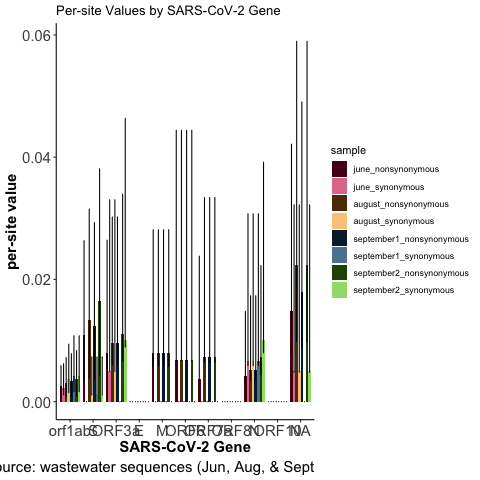

In [85]:
%%R

# load the ggplot2 library
library(ggplot2)

tp_data <- read.table(file = 'ivar_intersection/final_table_with_ci.csv', sep = '\t', header = TRUE)
tp_data <- tp_data[c('sample','GENE', 'per_site_value','low_ci_95', 'high_ci_95')]

tp_data$GENE <- factor(tp_data$GENE,levels = c("orf1ab", "S", "ORF3a", "E", "M", "ORF6","ORF7a","ORF8","N","ORF10"))
tp_data$sample <- factor(tp_data$sample,levels = c("june_nonsynonymous","june_synonymous", 
                                                  "august_nonsynonymous","august_synonymous",
                                                  "september1_nonsynonymous","september1_synonymous",
                                                  "september2_nonsynonymous","september2_synonymous"))



plot <- ggplot(tp_data, aes(x=GENE, y=per_site_value, fill=sample),fig(12,3)) +
  geom_bar(width=0.9,position=position_dodge(), stat="identity")+
  geom_errorbar(aes(ymin=per_site_value-low_ci_95, ymax=per_site_value+high_ci_95),
                width=.2,                    # Width of the error bars
                position=position_dodge(0.9)) +
  scale_color_grey() + theme_classic() +
  scale_fill_manual(values=c('#550319', "#E17D98", "#5E3803","#F8CA8A", '#06243D', '#5E82A0','#245302', '#A2DB7A'))+
  labs(title="Per-site Values by SARS-CoV-2 Gene", y="per-site value", x="SARS-CoV-2 Gene", caption="Source: wastewater sequences (Jun, Aug, & Sept") +
  theme(plot.caption=element_text(size=15), axis.title.x=element_text(size=15, face="bold"), axis.title.y=element_text(size=15, face="bold"),
        axis.text.x=element_text(size=15), axis.text.y=element_text(size=15))

ggsave('figures/per_site_with_ci.pdf', dpi=300, width = 12, height = 3, units = 'in' )
print(plot) #looks weird here, but it saves correctly

In [ ]:
# Figure saves correctly. It just looks weird here

# Significance test for Panel D

In [59]:
df = pd.read_csv('ivar_intersection/final_table_with_ci.csv', sep='\t')
df = df[['sample',	'GENE',	'per_site_value',	'low_ci_95',	'high_ci_95']]
df.loc[df['sample'].str.endswith('_synonymous'), 'type'] = 'Syn'
df.loc[df['sample'].str.endswith('_nonsynonymous'), 'type'] = 'NSyn'
df['GENE'].unique()

array(['orf1ab', 'S', 'S-Nterminal', 'ORF3a', 'M', 'ORF6', 'ORF7a',
       'ORF8', 'N', 'E', 'ORF10'], dtype=object)

In [61]:
orf1_s = df[(df['GENE'] == 'orf1ab') & (df['type'] == 'Syn')]
orf1_n = df[(df['GENE'] == 'orf1ab') & (df['type'] == 'NSyn')]

spike_s = df[(df['GENE'] == 'S') & (df['type'] == 'Syn')]
spike_n = df[(df['GENE'] == 'S') & (df['type'] == 'NSyn')]

spike_nt_s = df[(df['GENE'] == 'S-Nterminal') & (df['type'] == 'Syn')]
spike_nt_n = df[(df['GENE'] == 'S-Nterminal') & (df['type'] == 'NSyn')]

orf3_s = df[(df['GENE'] == 'ORF3a') & (df['type'] == 'Syn')]
orf3_n = df[(df['GENE'] == 'ORF3a') & (df['type'] == 'NSyn')]

m_s = df[(df['GENE'] == 'M') & (df['type'] == 'Syn')]
m_n = df[(df['GENE'] == 'M') & (df['type'] == 'NSyn')]

orf6_s = df[(df['GENE'] == 'ORF6') & (df['type'] == 'Syn')]
orf6_n = df[(df['GENE'] == 'ORF6') & (df['type'] == 'NSyn')]

orf7_s = df[(df['GENE'] == 'ORF7a') & (df['type'] == 'Syn')]
orf7_n = df[(df['GENE'] == 'ORF7a') & (df['type'] == 'NSyn')]

orf8_s = df[(df['GENE'] == 'ORF8') & (df['type'] == 'Syn')]
orf8_n = df[(df['GENE'] == 'ORF8') & (df['type'] == 'NSyn')]

n_s = df[(df['GENE'] == 'N') & (df['type'] == 'Syn')]
n_n = df[(df['GENE'] == 'N') & (df['type'] == 'NSyn')]

e_s = df[(df['GENE'] == 'E') & (df['type'] == 'Syn')]
e_n = df[(df['GENE'] == 'E') & (df['type'] == 'NSyn')]

orf10_s = df[(df['GENE'] == 'ORF10') & (df['type'] == 'Syn')]
orf10_n = df[(df['GENE'] == 'ORF10') & (df['type'] == 'NSyn')]




In [71]:
print('stats for orf1: ', stats.mannwhitneyu(x=orf1_n['per_site_value'], y=orf1_s['per_site_value'], alternative = 'two-sided'))
print('stats for S: ', stats.mannwhitneyu(x=spike_n['per_site_value'], y=spike_s['per_site_value'], alternative = 'two-sided'))
print('stats for S-NT: ', stats.mannwhitneyu(x=spike_nt_n['per_site_value'], y=spike_nt_s['per_site_value'], alternative = 'two-sided'))
print('stats for orf3: ', stats.mannwhitneyu(x=orf3_n['per_site_value'], y=orf3_s['per_site_value'], alternative = 'two-sided'))
#print('stats for M: ', stats.mannwhitneyu(x=m_n['per_site_value'], y=m_s['per_site_value'], alternative = 'two-sided'))
#print('stats for orf6: ', stats.mannwhitneyu(x=orf6_n['per_site_value'], y=orf6_s['per_site_value'], alternative = 'two-sided'))
#print('stats for orf7: ', stats.mannwhitneyu(x=orf7_n['per_site_value'], y=orf7_s['per_site_value'], alternative = 'two-sided'))
#print('stats for orf8: ', stats.mannwhitneyu(x=orf8_n['per_site_value'], y=orf8_s['per_site_value'], alternative = 'two-sided'))
print('stats for N: ', stats.mannwhitneyu(x=n_n['per_site_value'], y=n_s['per_site_value'], alternative = 'two-sided'))
#print('stats for E: ', stats.mannwhitneyu(x=e_n['per_site_value'], y=e_s['per_site_value'], alternative = 'two-sided'))
#print('stats for orf10: ', stats.mannwhitneyu(x=orf10_n['per_site_value'], y=orf10_s['per_site_value'], alternative = 'two-sided'))


stats for orf1:  MannwhitneyuResult(statistic=5.0, pvalue=0.4857142857142857)
stats for S:  MannwhitneyuResult(statistic=16.0, pvalue=0.02857142857142857)
stats for S-NT:  MannwhitneyuResult(statistic=16.0, pvalue=0.02857142857142857)
stats for orf3:  MannwhitneyuResult(statistic=13.0, pvalue=0.2)
stats for N:  MannwhitneyuResult(statistic=3.0, pvalue=0.2)


In [69]:
print('stats for S: ', stats.mannwhitneyu(x=spike_n['per_site_value'], y=orf1_n['per_site_value'], alternative = 'greater'))
print('stats for S: ', stats.mannwhitneyu(x=spike_n['per_site_value'], y=orf3_n['per_site_value'], alternative = 'greater'))
print('stats for S: ', stats.mannwhitneyu(x=spike_n['per_site_value'], y=m_n['per_site_value'], alternative = 'greater'))
print('stats for S: ', stats.mannwhitneyu(x=spike_n['per_site_value'], y=orf6_n['per_site_value'], alternative = 'greater'))
print('stats for S: ', stats.mannwhitneyu(x=spike_n['per_site_value'], y=orf7_n['per_site_value'], alternative = 'greater'))
#print('stats for S: ', stats.mannwhitneyu(x=spike_n['per_site_value'], y=orf8_n['per_site_value'], alternative = 'greater'))
print('stats for S: ', stats.mannwhitneyu(x=spike_n['per_site_value'], y=n_n['per_site_value'], alternative = 'greater'))
#print('stats for S: ', stats.mannwhitneyu(x=spike_n['per_site_value'], y=e_n['per_site_value'], alternative = 'greater'))
#print('stats for S: ', stats.mannwhitneyu(x=spike_n['per_site_value'], y=orf10_n['per_site_value'], alternative = 'greater'))


stats for S:  MannwhitneyuResult(statistic=16.0, pvalue=0.014285714285714285)
stats for S:  MannwhitneyuResult(statistic=15.0, pvalue=0.02857142857142857)
stats for S:  MannwhitneyuResult(statistic=16.0, pvalue=0.010535285067189329)
stats for S:  MannwhitneyuResult(statistic=16.0, pvalue=0.010535285067189329)
stats for S:  MannwhitneyuResult(statistic=16.0, pvalue=0.014285714285714285)
stats for S:  MannwhitneyuResult(statistic=16.0, pvalue=0.014285714285714285)


In [67]:
print('stats for S: ', stats.mannwhitneyu(x=spike_s['per_site_value'], y=orf1_s['per_site_value'], alternative = 'greater'))
print('stats for S: ', stats.mannwhitneyu(x=spike_s['per_site_value'], y=orf3_s['per_site_value'], alternative = 'greater'))
#print('stats for S: ', stats.mannwhitneyu(x=spike_s['per_site_value'], y=m_s['per_site_value'], alternative = 'greater'))
#print('stats for S: ', stats.mannwhitneyu(x=spike_s['per_site_value'], y=orf6_s['per_site_value'], alternative = 'greater'))
#print('stats for S: ', stats.mannwhitneyu(x=spike_s['per_site_value'], y=orf7_s['per_site_value'], alternative = 'greater'))
#print('stats for S: ', stats.mannwhitneyu(x=spike_s['per_site_value'], y=orf8_s['per_site_value'], alternative = 'greater'))
print('stats for S: ', stats.mannwhitneyu(x=spike_s['per_site_value'], y=n_s['per_site_value'], alternative = 'greater'))
#print('stats for S: ', stats.mannwhitneyu(x=spike_s['per_site_value'], y=e_s['per_site_value'], alternative = 'greater'))
#print('stats for S: ', stats.mannwhitneyu(x=spike_s['per_site_value'], y=orf10_s['per_site_value'], alternative = 'greater'))


stats for S:  MannwhitneyuResult(statistic=0.0, pvalue=0.9999999999999998)
stats for S:  MannwhitneyuResult(statistic=3.5, pvalue=0.9267554080323958)
stats for S:  MannwhitneyuResult(statistic=0.0, pvalue=0.9999999999999998)


# Sliding window analysis

In [3]:
june_sw = pd.read_csv('ivar_intersection/june16/june16_SNPGenie_Results/SNPGenie_Results/sliding_window_length30_results.txt', sep='\t')
june_sw = june_sw[['product','first_site', 'last_site', 'piN','piS', 'piN/piS']]
june_sw['piN_over_piS'] = june_sw['piN'] / june_sw['piS']
june_sw = june_sw.fillna(0)
june_sw['piN_over_piS'].replace([np.inf, -np.inf], 0, inplace=True)
june_sw = june_sw[(june_sw['first_site']>=21562)&(june_sw['last_site']<=25384)]
june_sw.loc[:, "first_site"] = june_sw["first_site"].apply(lambda x: x - 21562)
june_sw.loc[:, "last_site"] = june_sw["last_site"].apply(lambda x: x - 21562)
june_sw = june_sw[june_sw['product']=='gene-S']

august_sw = pd.read_csv('ivar_intersection/august16/august16_SNPGenie_Results/SNPGenie_Results/sliding_window_length30_results.txt', sep='\t')
august_sw = august_sw[['product','first_site', 'last_site', 'piN','piS', 'piN/piS']]
august_sw['piN_over_piS'] = august_sw['piN'] / august_sw['piS']
august_sw = august_sw.fillna(0)
august_sw['piN_over_piS'].replace([np.inf, -np.inf], 0, inplace=True)
august_sw = august_sw[(august_sw['first_site']>=21562)&(august_sw['last_site']<=25384)]
august_sw.loc[:, "first_site"] = august_sw["first_site"].apply(lambda x: x - 21562)
august_sw.loc[:, "last_site"] = august_sw["last_site"].apply(lambda x: x - 21562)
august_sw = august_sw[august_sw['product']=='gene-S']

september1_sw = pd.read_csv('ivar_intersection/september23/september23_SNPGenie_Results/SNPGenie_Results/sliding_window_length30_results.txt', sep='\t')
september1_sw = september1_sw[['product','first_site', 'last_site', 'piN','piS', 'piN/piS']]
september1_sw['piN_over_piS'] = september1_sw['piN'] / september1_sw['piS']
september1_sw = september1_sw.fillna(0)
september1_sw['piN_over_piS'].replace([np.inf, -np.inf], 0, inplace=True)
september1_sw = september1_sw[(september1_sw['first_site']>=21562)&(september1_sw['last_site']<=25384)]
september1_sw.loc[:, "first_site"] = september1_sw["first_site"].apply(lambda x: x - 21562)
september1_sw.loc[:, "last_site"] = september1_sw["last_site"].apply(lambda x: x - 21562)
september1_sw = september1_sw[september1_sw['product']=='gene-S']

september2_sw = pd.read_csv('ivar_intersection/september27/september27_SNPGenie_Results/SNPGenie_Results/sliding_window_length30_results.txt', sep='\t')
september2_sw = september2_sw[['product','first_site', 'last_site', 'piN','piS', 'piN/piS']]
september2_sw['piN_over_piS'] = september2_sw['piN'] / september2_sw['piS']
september2_sw = september2_sw.fillna(0)
september2_sw['piN_over_piS'].replace([np.inf, -np.inf], 0, inplace=True)
september2_sw = september2_sw[(september2_sw['first_site']>=21562)&(september2_sw['last_site']<=25384)]
september2_sw.loc[:, "first_site"] = september2_sw["first_site"].apply(lambda x: x - 21562)
september2_sw.loc[:, "last_site"] = september2_sw["last_site"].apply(lambda x: x - 21562)
september2_sw = september2_sw[september2_sw['product']=='gene-S']

june_sw

,product,first_site,last_site,piN,piS,piN/piS,piN_over_piS
1108,gene-S,1,90,0.003744,0.0,*,0.0
1109,gene-S,4,93,0.003801,0.0,*,0.0
1110,gene-S,7,96,0.003801,0.0,*,0.0
1111,gene-S,10,99,0.003801,0.0,*,0.0
1112,gene-S,13,102,0.003840,0.0,*,0.0
...,...,...,...,...,...,...,...
2348,gene-S,3721,3810,0.005343,0.0,*,0.0
2349,gene-S,3724,3813,0.005331,0.0,*,0.0
2350,gene-S,3727,3816,0.005381,0.0,*,0.0
2351,gene-S,3730,3819,0.005419,0.0,*,0.0


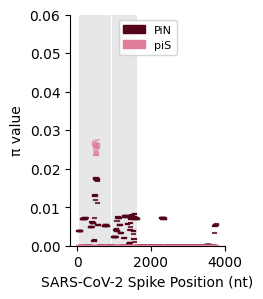

In [96]:
fig = plt.figure(figsize=(2,3), facecolor='w')
plt.style.use('default')

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

for start, end, value,  in zip(june_sw["first_site"], june_sw["last_site"], june_sw["piN"]):
    plt.plot([start, end], [value, value], color='#550319',markersize=2, alpha=0.8,zorder=9)
june_pin = mpatches.Patch(color='#550319', label='PiN')

for start, end, value,  in zip(june_sw["first_site"], june_sw["last_site"], june_sw["piS"]):
    plt.plot([start, end], [value, value], color='#E17D98',markersize=2, alpha=0.5,zorder=9)
june_pis = mpatches.Patch(color='#E17D98', label='piS')




axes = plt.gca()

# axes.set_xlim([1, 30000])
axes.set_ylim([0, 0.06])

# axes.axvspan(266, 21555, facecolor='#C5C5C9', alpha=0.3, zorder=1)
axes.axvspan(45, 917, facecolor='#C5C5C9', alpha=0.4, zorder=1)
axes.axvspan(954, 1623, facecolor='#C5C5C9', alpha=0.4, zorder=1)
# axes.axvspan(27394, 27759, facecolor='#C5C5C9', alpha=0.3, zorder=1)
# axes.axvspan(28274, 29533, facecolor='#C5C5C9', alpha=0.3, zorder=1)
# axes.axhspan(-2, 1, facecolor='white', alpha=0.7, zorder=10)



#plt.text(10544,23,'ORF1a/b', fontweight='bold', size=7, rotation=90, color='#737b7b')
#plt.text(23373,29,'S', fontweight='bold', size=10, rotation=90, color='#836a62')
#plt.text(25507,25,'ORF3a', fontweight='bold', size=7, rotation=90, color='#737b7b')
#plt.text(26059,29,'E', fontweight='bold', size=10, rotation=90, color='#836a62')
#plt.text(26557,0.05,'M', fontweight='bold', size=10, rotation=90, color='#737b7b')
#plt.text(27045,25,'ORF6', fontweight='bold', size=7, rotation=90, color='#836a62')
#plt.text(27377,25,'ORF7a', fontweight='bold', size=7, rotation=90, color='#737b7b')
#plt.text(27875,26,'ORF8', fontweight='bold', size=7, rotation=90, color='#836a62')
#plt.text(28604,28.5,'N', fontweight='bold', size=10, rotation=90, color='#737b7b')
#plt.text(29516,24.5,'ORF10', fontweight='bold', size=8, rotation=90, color='#836a62')

#plt.axhline(y = 1, color = 'gray', linestyle = 'dashed', alpha=0.7)

plt.legend(handles=[june_pin, june_pis],loc=9, fontsize=8, frameon=True, facecolor='white')
plt.xlabel("SARS-CoV-2 Spike Position (nt)")
plt.ylabel("π value", rotation=90)
#plt.title("πN & πS in June over a sliding window of 30 codons (90nts)")
plt.savefig('figures/diversity_june_sliding_window.png', dpi=600, bbox_inches='tight')
plt.savefig('figures/diversity_june_sliding_window.pdf', dpi=600, bbox_inches='tight')
#plt.savefig('bam_files/figures/diversity_june_sliding_window.svg', dpi=600, bbox_inches='tight')

plt.show()

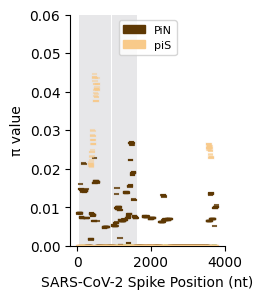

In [97]:
fig = plt.figure(figsize=(2,3), facecolor='w')
plt.style.use('default')

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

for start, end, value,  in zip(august_sw["first_site"], august_sw["last_site"], august_sw["piN"]):
    plt.plot([start, end], [value, value], color='#5E3803',markersize=2, alpha=0.8,zorder=9)
august_pin = mpatches.Patch(color='#5E3803', label='PiN')

for start, end, value,  in zip(august_sw["first_site"], august_sw["last_site"], august_sw["piS"]):
    plt.plot([start, end], [value, value], color='#F8CA8A',markersize=2, alpha=0.5,zorder=9)
august_pis = mpatches.Patch(color='#F8CA8A', label='piS')




axes = plt.gca()

# axes.set_xlim([1, 30000])
axes.set_ylim([0, 0.06])

# axes.axvspan(266, 21555, facecolor='#C5C5C9', alpha=0.3, zorder=1)
axes.axvspan(45, 917, facecolor='#C5C5C9', alpha=0.4, zorder=1)
axes.axvspan(954, 1623, facecolor='#C5C5C9', alpha=0.4, zorder=1)
# axes.axvspan(27394, 27759, facecolor='#C5C5C9', alpha=0.3, zorder=1)
# axes.axvspan(28274, 29533, facecolor='#C5C5C9', alpha=0.3, zorder=1)
# axes.axhspan(-2, 1, facecolor='white', alpha=0.7, zorder=10)



#plt.text(10544,23,'ORF1a/b', fontweight='bold', size=7, rotation=90, color='#737b7b')
#plt.text(23373,29,'S', fontweight='bold', size=10, rotation=90, color='#836a62')
#plt.text(25507,25,'ORF3a', fontweight='bold', size=7, rotation=90, color='#737b7b')
#plt.text(26059,29,'E', fontweight='bold', size=10, rotation=90, color='#836a62')
#plt.text(26557,0.05,'M', fontweight='bold', size=10, rotation=90, color='#737b7b')
#plt.text(27045,25,'ORF6', fontweight='bold', size=7, rotation=90, color='#836a62')
#plt.text(27377,25,'ORF7a', fontweight='bold', size=7, rotation=90, color='#737b7b')
#plt.text(27875,26,'ORF8', fontweight='bold', size=7, rotation=90, color='#836a62')
#plt.text(28604,28.5,'N', fontweight='bold', size=10, rotation=90, color='#737b7b')
#plt.text(29516,24.5,'ORF10', fontweight='bold', size=8, rotation=90, color='#836a62')

#plt.axhline(y = 1, color = 'gray', linestyle = 'dashed', alpha=0.7)

plt.legend(handles=[august_pin, august_pis],loc=9, fontsize=8, frameon=True, facecolor='white')
plt.xlabel("SARS-CoV-2 Spike Position (nt)")
plt.ylabel("π value", rotation=90)
#plt.title("πN & πS in August over a sliding window of 30 codons (90nts)")
plt.savefig('figures/diversity_august_sliding_window.png', dpi=600, bbox_inches='tight')
plt.savefig('figures/diversity_august_sliding_window.pdf', dpi=600, bbox_inches='tight')
# plt.savefig('bam_files/figures/diversity_august_sliding_window.svg', dpi=600, bbox_inches='tight')

plt.show()

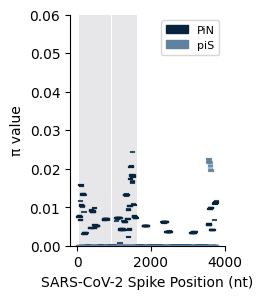

In [98]:
fig = plt.figure(figsize=(2,3), facecolor='w')
plt.style.use('default')

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

for start, end, value,  in zip(september1_sw["first_site"], september1_sw["last_site"], september1_sw["piN"]):
    plt.plot([start, end], [value, value], color='#06243D',markersize=2, alpha=0.8,zorder=9)
september1_pin = mpatches.Patch(color='#06243D', label='PiN')

for start, end, value,  in zip(september1_sw["first_site"], september1_sw["last_site"], september1_sw["piS"]):
    plt.plot([start, end], [value, value], color='#5E82A0',markersize=2, alpha=0.5,zorder=9)
september1_pis = mpatches.Patch(color='#5E82A0', label='piS')



axes = plt.gca()

# axes.set_xlim([1, 30000])
axes.set_ylim([0, 0.06])

# axes.axvspan(266, 21555, facecolor='#C5C5C9', alpha=0.3, zorder=1)
axes.axvspan(45, 917, facecolor='#C5C5C9', alpha=0.4, zorder=1)
axes.axvspan(954, 1623, facecolor='#C5C5C9', alpha=0.4, zorder=1)
# axes.axvspan(27394, 27759, facecolor='#C5C5C9', alpha=0.3, zorder=1)
# axes.axvspan(28274, 29533, facecolor='#C5C5C9', alpha=0.3, zorder=1)
# axes.axhspan(-2, 1, facecolor='white', alpha=0.7, zorder=10)


#plt.text(10544,23,'ORF1a/b', fontweight='bold', size=7, rotation=90, color='#737b7b')
#plt.text(23373,29,'S', fontweight='bold', size=10, rotation=90, color='#836a62')
#plt.text(25507,25,'ORF3a', fontweight='bold', size=7, rotation=90, color='#737b7b')
#plt.text(26059,29,'E', fontweight='bold', size=10, rotation=90, color='#836a62')
#plt.text(26557,0.05,'M', fontweight='bold', size=10, rotation=90, color='#737b7b')
#plt.text(27045,25,'ORF6', fontweight='bold', size=7, rotation=90, color='#836a62')
#plt.text(27377,25,'ORF7a', fontweight='bold', size=7, rotation=90, color='#737b7b')
#plt.text(27875,26,'ORF8', fontweight='bold', size=7, rotation=90, color='#836a62')
#plt.text(28604,28.5,'N', fontweight='bold', size=10, rotation=90, color='#737b7b')
#plt.text(29516,24.5,'ORF10', fontweight='bold', size=8, rotation=90, color='#836a62')

#plt.axhline(y = 1, color = 'gray', linestyle = 'dashed', alpha=0.7)

plt.legend(handles=[september1_pin, september1_pis],loc='best', fontsize=8, frameon=True, facecolor='white')
plt.xlabel("SARS-CoV-2 Spike Position (nt)")
plt.ylabel("π value", rotation=90)
#plt.title("πN & πS in September 23 over a sliding window of 30 codons (90nts)")
plt.savefig('figures/diversity_september1_sliding_window.png', dpi=600, bbox_inches='tight')
plt.savefig('figures/diversity_september1_sliding_window.pdf', dpi=600, bbox_inches='tight')
# plt.savefig('bam_files/figures/diversity_september1_sliding_window.svg', dpi=600, bbox_inches='tight')

plt.show()

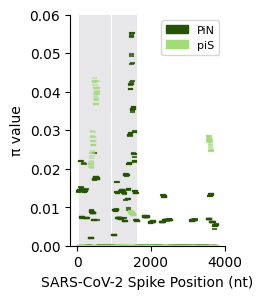

In [99]:
fig = plt.figure(figsize=(2,3), facecolor='w')
plt.style.use('default')

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

for start, end, value,  in zip(september2_sw["first_site"], september2_sw["last_site"], september2_sw["piN"]):
    plt.plot([start, end], [value, value], color='#245302',markersize=2, alpha=0.8,zorder=9)
september2_pin = mpatches.Patch(color='#245302', label='PiN')

for start, end, value,  in zip(september2_sw["first_site"], september2_sw["last_site"], september2_sw["piS"]):
    plt.plot([start, end], [value, value], color='#A2DB7A',markersize=2, alpha=0.5,zorder=9)
september2_pis = mpatches.Patch(color='#A2DB7A', label='piS')




axes = plt.gca()

# axes.set_xlim([1, 30000])
axes.set_ylim([0, 0.06])

# axes.axvspan(266, 21555, facecolor='#C5C5C9', alpha=0.3, zorder=1)
axes.axvspan(45, 917, facecolor='#C5C5C9', alpha=0.4, zorder=1)
axes.axvspan(954, 1623, facecolor='#C5C5C9', alpha=0.4, zorder=1)
# axes.axvspan(27394, 27759, facecolor='#C5C5C9', alpha=0.3, zorder=1)
# axes.axvspan(28274, 29533, facecolor='#C5C5C9', alpha=0.3, zorder=1)
# axes.axhspan(-2, 1, facecolor='white', alpha=0.7, zorder=10)


#plt.text(10544,23,'ORF1a/b', fontweight='bold', size=7, rotation=90, color='#737b7b')
#plt.text(23373,29,'S', fontweight='bold', size=10, rotation=90, color='#836a62')
#plt.text(25507,25,'ORF3a', fontweight='bold', size=7, rotation=90, color='#737b7b')
#plt.text(26059,29,'E', fontweight='bold', size=10, rotation=90, color='#836a62')
#plt.text(26557,0.05,'M', fontweight='bold', size=10, rotation=90, color='#737b7b')
#plt.text(27045,25,'ORF6', fontweight='bold', size=7, rotation=90, color='#836a62')
#plt.text(27377,25,'ORF7a', fontweight='bold', size=7, rotation=90, color='#737b7b')
#plt.text(27875,26,'ORF8', fontweight='bold', size=7, rotation=90, color='#836a62')
#plt.text(28604,28.5,'N', fontweight='bold', size=10, rotation=90, color='#737b7b')
#plt.text(29516,24.5,'ORF10', fontweight='bold', size=8, rotation=90, color='#836a62')

#plt.axhline(y = 1, color = 'gray', linestyle = 'dashed', alpha=0.7)

plt.legend(handles=[september2_pin, september2_pis],loc='best', fontsize=8, frameon=True, facecolor='white')
plt.xlabel("SARS-CoV-2 Spike Position (nt)")
plt.ylabel("π value", rotation=90)
#plt.title("πN & πS in September 27 over a sliding window of 30 codons (90nts)")
plt.savefig('figures/diversity_september2_sliding_window.png', dpi=600, bbox_inches='tight')
plt.savefig('figures/diversity_september2_sliding_window.pdf', dpi=600, bbox_inches='tight')
# plt.savefig('bam_files/figures/diversity_september2_sliding_window.svg', dpi=600, bbox_inches='tight')

plt.show()

# Visualizing iSNV frequencies

Not included on the manuscript

In [101]:
june = pd.read_csv('ivar_intersection/june16/june16_cleaned_isnv.csv', sep='\t')
june = june[['iSNV', 'AF', 'Var_type']]
june = june[june['Var_type']!='upstream_gene_variant']
june = june[june['Var_type']!='disruptive_inframe_deletion']
june = june[june['Var_type']!='conservative_inframe_deletion']
june = june[june['Var_type']!='frameshift_variant']
june = june[june['Var_type']!='stop_gained']
june = june[june['Var_type']!='disruptive_inframe_insertion']
june_split = june.iSNV.str.split("_", expand=True)
june_nt = june_split[1]
june_nt = june_nt.str[1:-1]
june_nt = pd.DataFrame(june_nt)
june['POS'] = june_nt.astype(int)
june['ann'] = pd.DataFrame(june_split[3])

june

,iSNV,AF,Var_type,POS,ann
3,orf1ab_C292T_N9N_syn,0.494228,synonymous_variant,292,syn
4,orf1ab_C335T_R24C_ns,0.933411,missense_variant,335,ns
5,orf1ab_T378C_V38A_ns,0.998313,missense_variant,378,ns
6,orf1ab_T394C_R43R_syn,0.739340,synonymous_variant,394,syn
7,orf1ab_G434A_E57K_ns,0.464065,missense_variant,434,ns
...,...,...,...,...,...
126,N_A28365C_E31A_ns,0.731746,missense_variant,28365,ns
127,N_T28382C_S37P_ns,0.998122,missense_variant,28382,ns
128,N_A28753G_Q160Q_syn,0.600074,synonymous_variant,28753,syn
129,N_C28854T_S194L_ns,0.997855,missense_variant,28854,ns


In [102]:
august = pd.read_csv('ivar_intersection/august16/august16_cleaned_isnv.csv', sep='\t')
august = august[['iSNV', 'AF', 'Var_type']]
august = august[august['Var_type']!='upstream_gene_variant']
august = august[august['Var_type']!='disruptive_inframe_deletion']
august = august[august['Var_type']!='conservative_inframe_deletion']
august = august[august['Var_type']!='frameshift_variant']
august = august[august['Var_type']!='stop_gained']
august = august[august['Var_type']!='disruptive_inframe_insertion']
august = august[august['Var_type']!='downstream_gene_variant']
august_split = august.iSNV.str.split("_", expand=True)
august_nt = august_split[1]
august_nt = august_nt.str[1:-1]
august_nt = pd.DataFrame(august_nt)
august['POS'] = august_nt.astype(int)
august['ann'] = pd.DataFrame(august_split[3])

august

,iSNV,AF,Var_type,POS,ann
5,orf1ab_C292T_N9N_syn,0.697271,synonymous_variant,292,syn
6,orf1ab_C329A_Q22K_ns,0.376642,missense_variant,329,ns
7,orf1ab_C335T_R24C_ns,0.986343,missense_variant,335,ns
8,orf1ab_C344T_L27F_ns,0.341257,missense_variant,344,ns
9,orf1ab_T378C_V38A_ns,0.997623,missense_variant,378,ns
...,...,...,...,...,...
164,N_T28382C_S37P_ns,0.997760,missense_variant,28382,ns
165,N_A28753G_Q160Q_syn,0.752518,synonymous_variant,28753,syn
166,N_C28854T_S194L_ns,0.998622,missense_variant,28854,ns
167,N_C29249T_P326S_ns,0.996822,missense_variant,29249,ns


In [103]:
september1 = pd.read_csv('ivar_intersection/september23/september23_cleaned_isnv.csv', sep='\t')
september1 = september1[['iSNV', 'AF', 'Var_type']]
september1 = september1[september1['Var_type']!='upstream_gene_variant']
september1 = september1[september1['Var_type']!='disruptive_inframe_deletion']
september1 = september1[september1['Var_type']!='conservative_inframe_deletion']
september1 = september1[september1['Var_type']!='frameshift_variant']
september1 = september1[september1['Var_type']!='stop_gained']
september1 = september1[september1['Var_type']!='disruptive_inframe_insertion']
september1 = september1[september1['Var_type']!='downstream_gene_variant']
september1_split = september1.iSNV.str.split("_", expand=True)
september1_nt = september1_split[1]
september1_nt = september1_nt.str[1:-1]
september1_nt = pd.DataFrame(september1_nt)
september1['POS'] = september1_nt.astype(int)
september1['ann'] = pd.DataFrame(september1_split[3])

september1

,iSNV,AF,Var_type,POS,ann
6,orf1ab_C292T_N9N_syn,0.883356,synonymous_variant,292,syn
7,orf1ab_C329A_Q22K_ns,0.427884,missense_variant,329,ns
8,orf1ab_C335T_R24C_ns,0.923360,missense_variant,335,ns
9,orf1ab_C344T_L27F_ns,0.429582,missense_variant,344,ns
10,orf1ab_T378C_V38A_ns,0.998003,missense_variant,378,ns
...,...,...,...,...,...
164,N_T28382C_S37P_ns,0.674812,missense_variant,28382,ns
165,N_A28753G_Q160Q_syn,0.800096,synonymous_variant,28753,syn
166,N_C28854T_S194L_ns,0.953324,missense_variant,28854,ns
167,N_C29249T_P326S_ns,0.997756,missense_variant,29249,ns


In [104]:
september2 = pd.read_csv('ivar_intersection/september27/september27_cleaned_isnv.csv', sep='\t')
september2 = september2[['iSNV', 'AF', 'Var_type']]
september2 = september2[september2['Var_type']!='upstream_gene_variant']
september2 = september2[september2['Var_type']!='disruptive_inframe_deletion']
september2 = september2[september2['Var_type']!='conservative_inframe_deletion']
september2 = september2[september2['Var_type']!='frameshift_variant']
september2 = september2[september2['Var_type']!='stop_gained']
september2 = september2[september2['Var_type']!='disruptive_inframe_insertion']
september2 = september2[september2['Var_type']!='downstream_gene_variant']
september2_split = september2.iSNV.str.split("_", expand=True)
september2_nt = september2_split[1]
september2_nt = september2_nt.str[1:-1]
september2_nt = pd.DataFrame(september2_nt)
september2['POS'] = september2_nt.astype(int)
september2['ann'] = pd.DataFrame(september2_split[3])

september2

,iSNV,AF,Var_type,POS,ann
6,orf1ab_C292T_N9N_syn,0.839896,synonymous_variant,292,syn
7,orf1ab_C329A_Q22K_ns,0.460540,missense_variant,329,ns
8,orf1ab_C335T_R24C_ns,0.910375,missense_variant,335,ns
9,orf1ab_C344T_L27F_ns,0.460800,missense_variant,344,ns
10,orf1ab_T378C_V38A_ns,0.998125,missense_variant,378,ns
...,...,...,...,...,...
195,N_T28382C_S37P_ns,0.596588,missense_variant,28382,ns
196,N_A28753G_Q160Q_syn,0.954782,synonymous_variant,28753,syn
197,N_C28854T_S194L_ns,0.998406,missense_variant,28854,ns
198,N_C29249T_P326S_ns,0.995433,missense_variant,29249,ns


In [109]:
june_n = june[june['ann']=='ns']
june_s = june[june['ann']=='syn']

august_n = august[august['ann']=='ns']
august_s = august[august['ann']=='syn']

september1_n = september1[september1['ann']=='ns']
september1_s = september1[september1['ann']=='syn']

september2_n = september2[september2['ann']=='ns']
september2_s = september2[september2['ann']=='syn']

Text(0.5, 1.0, 'Non-Synonymous Mutations \n\n')

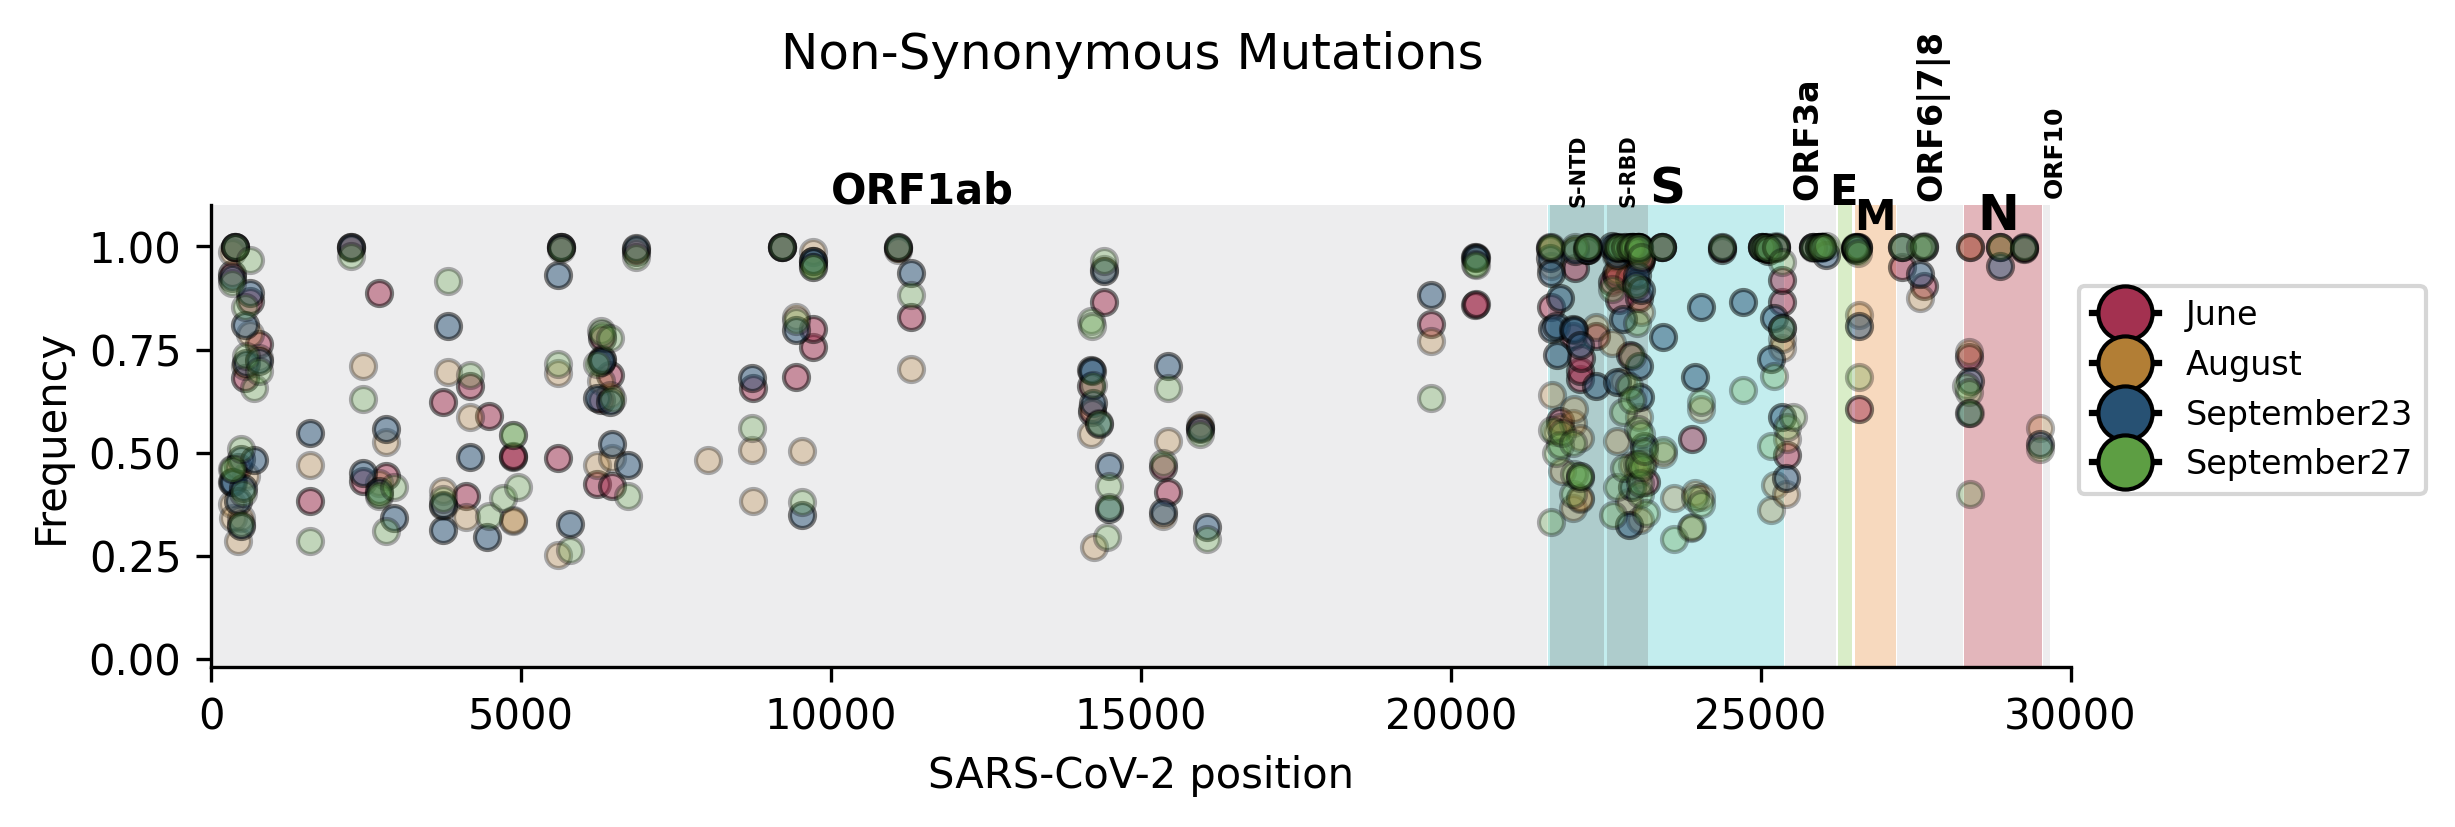

In [134]:

figure(figsize=(8,2), dpi=300)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

axes = plt.gca()
axes.set_xlim([-10, 30000])
axes.set_ylim([-0.02,1.1])


#This is for separating genes with a color panel
axes.axvspan(0, 21555, facecolor='#C5C5C9', alpha=0.3, zorder=1) #ORF1a|b
axes.axvspan(21563, 25384, facecolor='#3BC6C8', alpha=0.3, zorder=1)#Spike
axes.axvspan(21598, 22474, facecolor='gray', alpha=0.3, zorder=1)#Spike-NTD
axes.axvspan(22517, 23186, facecolor='gray', alpha=0.3, zorder=1)#Spike-RBD
axes.axvspan(26245, 26472, facecolor='#83c54a', alpha=0.3, zorder=1) # Envelope
axes.axvspan(25393, 26220, facecolor='#C5C5C9', alpha=0.3, zorder=1) # ORF3a
axes.axvspan(26523, 27191, facecolor='#e68329', alpha=0.3, zorder=1) # Matrix
axes.axvspan(28274, 29533, facecolor='#a41020', alpha=0.3, zorder=1)# Nucleocapsid
axes.axvspan(27202, 28259, facecolor='#C5C5C9', alpha=0.3, zorder=1) #ORF 6-8
axes.axvspan(29558, 29674, facecolor='#C5C5C9', alpha=0.3, zorder=1) #ORF 10

#text for gene segments
plt.text(10000,1.105,'ORF1ab', fontweight='bold', size=10, rotation=0)
plt.text(23200,1.105,'S', fontweight='bold', size=12)
plt.text(21900,1.105,'S-NTD', fontweight='bold', size=5,rotation=90)
plt.text(22700,1.105,'S-RBD', fontweight='bold', size=5,rotation=90)
plt.text(25500,1.13,'ORF3a', fontweight='bold', size=8, rotation=90)
plt.text(26100,1.1,'E', fontweight='bold', size=10)
plt.text(26500,1.04,'M', fontweight='bold', size=10)
plt.text(27500,1.13,'ORF6|7|8', fontweight='bold', size=8, rotation=90)
plt.text(28500,1.04,'N', fontweight='bold', size=12)
plt.text(29550,1.13,'ORF10', fontweight='bold', size=6, rotation=90)

legend_elements = [Line2D([0], [0], marker='o', color='black', label='June', markerfacecolor='#A33150', markersize=13),
                   Line2D([0], [0], marker='o', color='black', label='August', markerfacecolor='#B27E35', markersize=13),
                  Line2D([0], [0], marker='o', color='black', label='September23', markerfacecolor='#275173', markersize=13),
                   Line2D([0], [0], marker='o', color='black', label='September27', markerfacecolor='#5D9E43', markersize=13)
                  ]

axes.legend(handles=legend_elements, bbox_to_anchor = (1.2, 0.6), loc='center right',prop={'size': 8})


plt.scatter(june_n.POS, june_n.AF, alpha=0.5, facecolors='#A33150', edgecolors='black', zorder=10)
plt.scatter(august_n.POS, august_n.AF, alpha=0.3, facecolors='#B27E35', edgecolors='black', zorder=10)
plt.scatter(september1_n.POS, september1_n.AF, alpha=0.5, facecolors='#275173', edgecolors='black', zorder=10)
plt.scatter(september2_n.POS, september2_n.AF, alpha=0.3, facecolors='#5D9E43', edgecolors='black', zorder=10)
plt.xlabel('SARS-CoV-2 position')
plt.ylabel("Frequency")
    
plt.title('Non-Synonymous Mutations \n\n')

Text(0.5, 1.0, 'Synonymous Mutations \n\n')

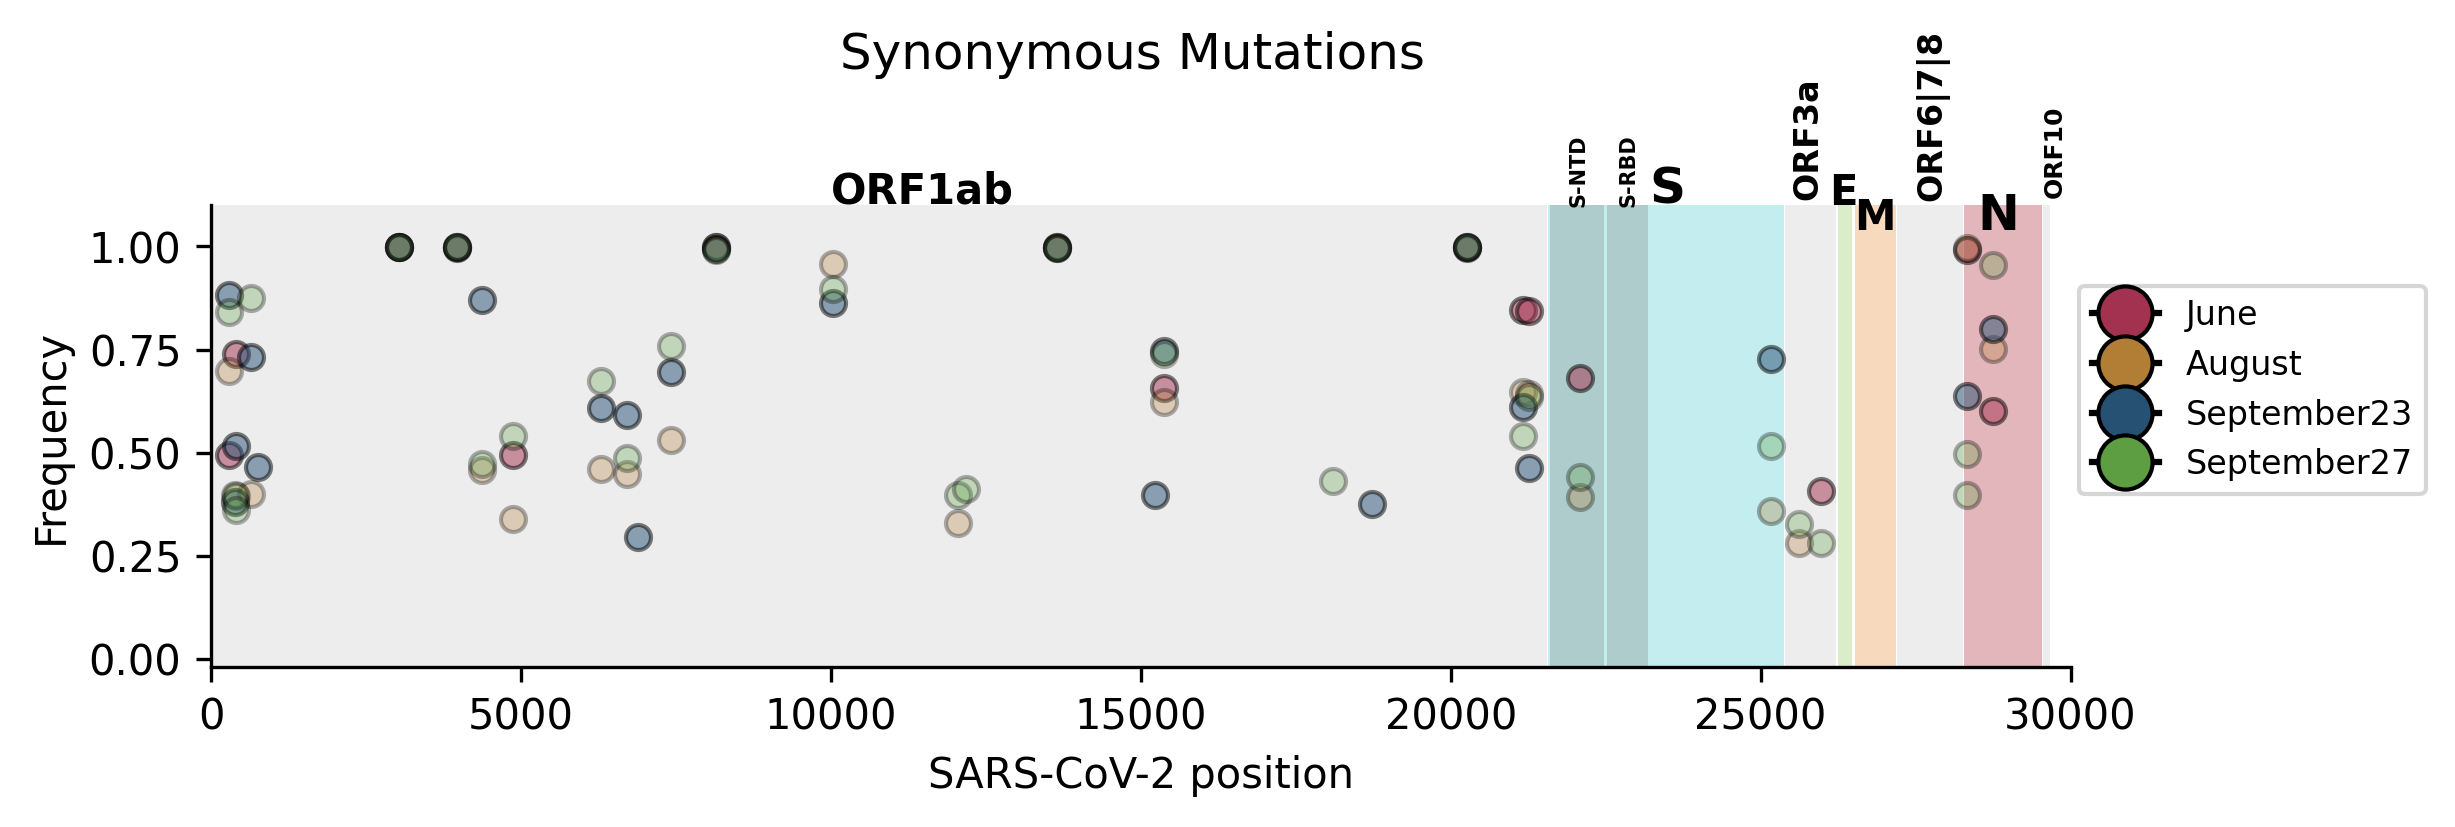

In [133]:

figure(figsize=(8,2), dpi=300)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

axes = plt.gca()
axes.set_xlim([-10, 30000])
axes.set_ylim([-0.02,1.1])


#This is for separating genes with a color panel
axes.axvspan(0, 21555, facecolor='#C5C5C9', alpha=0.3, zorder=1) #ORF1a|b
axes.axvspan(21563, 25384, facecolor='#3BC6C8', alpha=0.3, zorder=1)#Spike
axes.axvspan(21598, 22474, facecolor='gray', alpha=0.3, zorder=1)#Spike-NTD
axes.axvspan(22517, 23186, facecolor='gray', alpha=0.3, zorder=1)#Spike-RBD
axes.axvspan(26245, 26472, facecolor='#83c54a', alpha=0.3, zorder=1) # Envelope
axes.axvspan(25393, 26220, facecolor='#C5C5C9', alpha=0.3, zorder=1) # ORF3a
axes.axvspan(26523, 27191, facecolor='#e68329', alpha=0.3, zorder=1) # Matrix
axes.axvspan(28274, 29533, facecolor='#a41020', alpha=0.3, zorder=1)# Nucleocapsid
axes.axvspan(27202, 28259, facecolor='#C5C5C9', alpha=0.3, zorder=1) #ORF 6-8
axes.axvspan(29558, 29674, facecolor='#C5C5C9', alpha=0.3, zorder=1) #ORF 10

#text for gene segments
plt.text(10000,1.105,'ORF1ab', fontweight='bold', size=10, rotation=0)
plt.text(23200,1.105,'S', fontweight='bold', size=12)
plt.text(21900,1.105,'S-NTD', fontweight='bold', size=5,rotation=90)
plt.text(22700,1.105,'S-RBD', fontweight='bold', size=5,rotation=90)
plt.text(25500,1.13,'ORF3a', fontweight='bold', size=8, rotation=90)
plt.text(26100,1.1,'E', fontweight='bold', size=10)
plt.text(26500,1.04,'M', fontweight='bold', size=10)
plt.text(27500,1.13,'ORF6|7|8', fontweight='bold', size=8, rotation=90)
plt.text(28500,1.04,'N', fontweight='bold', size=12)
plt.text(29550,1.13,'ORF10', fontweight='bold', size=6, rotation=90)


legend_elements = [Line2D([0], [0], marker='o', color='black', label='June', markerfacecolor='#A33150', markersize=13),
                   Line2D([0], [0], marker='o', color='black', label='August', markerfacecolor='#B27E35', markersize=13),
                  Line2D([0], [0], marker='o', color='black', label='September23', markerfacecolor='#275173', markersize=13),
                   Line2D([0], [0], marker='o', color='black', label='September27', markerfacecolor='#5D9E43', markersize=13)
                  ]

axes.legend(handles=legend_elements, bbox_to_anchor = (1.2, 0.6), loc='center right',prop={'size': 8})
plt.scatter(june_s.POS, june_s.AF, alpha=0.5, facecolors='#A33150', edgecolors='black', zorder=10)
plt.scatter(august_s.POS, august_s.AF, alpha=0.3, facecolors='#B27E35', edgecolors='black', zorder=10)
plt.scatter(september1_s.POS, september1_s.AF, alpha=0.5, facecolors='#275173', edgecolors='black', zorder=10)
plt.scatter(september2_s.POS, september2_s.AF, alpha=0.3, facecolors='#5D9E43', edgecolors='black', zorder=10)
plt.xlabel('SARS-CoV-2 position')
plt.ylabel("Frequency")

plt.title('Synonymous Mutations \n\n')
    